In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [5]:
data = pd.read_csv("data.csv")
data.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [6]:
data.shape

(15420, 33)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

## Checking missing value

In [12]:
data.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

Fortunately, there is no missing value

## Checking the numerical features

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


## Checking histograms of numerical features so far according to the data

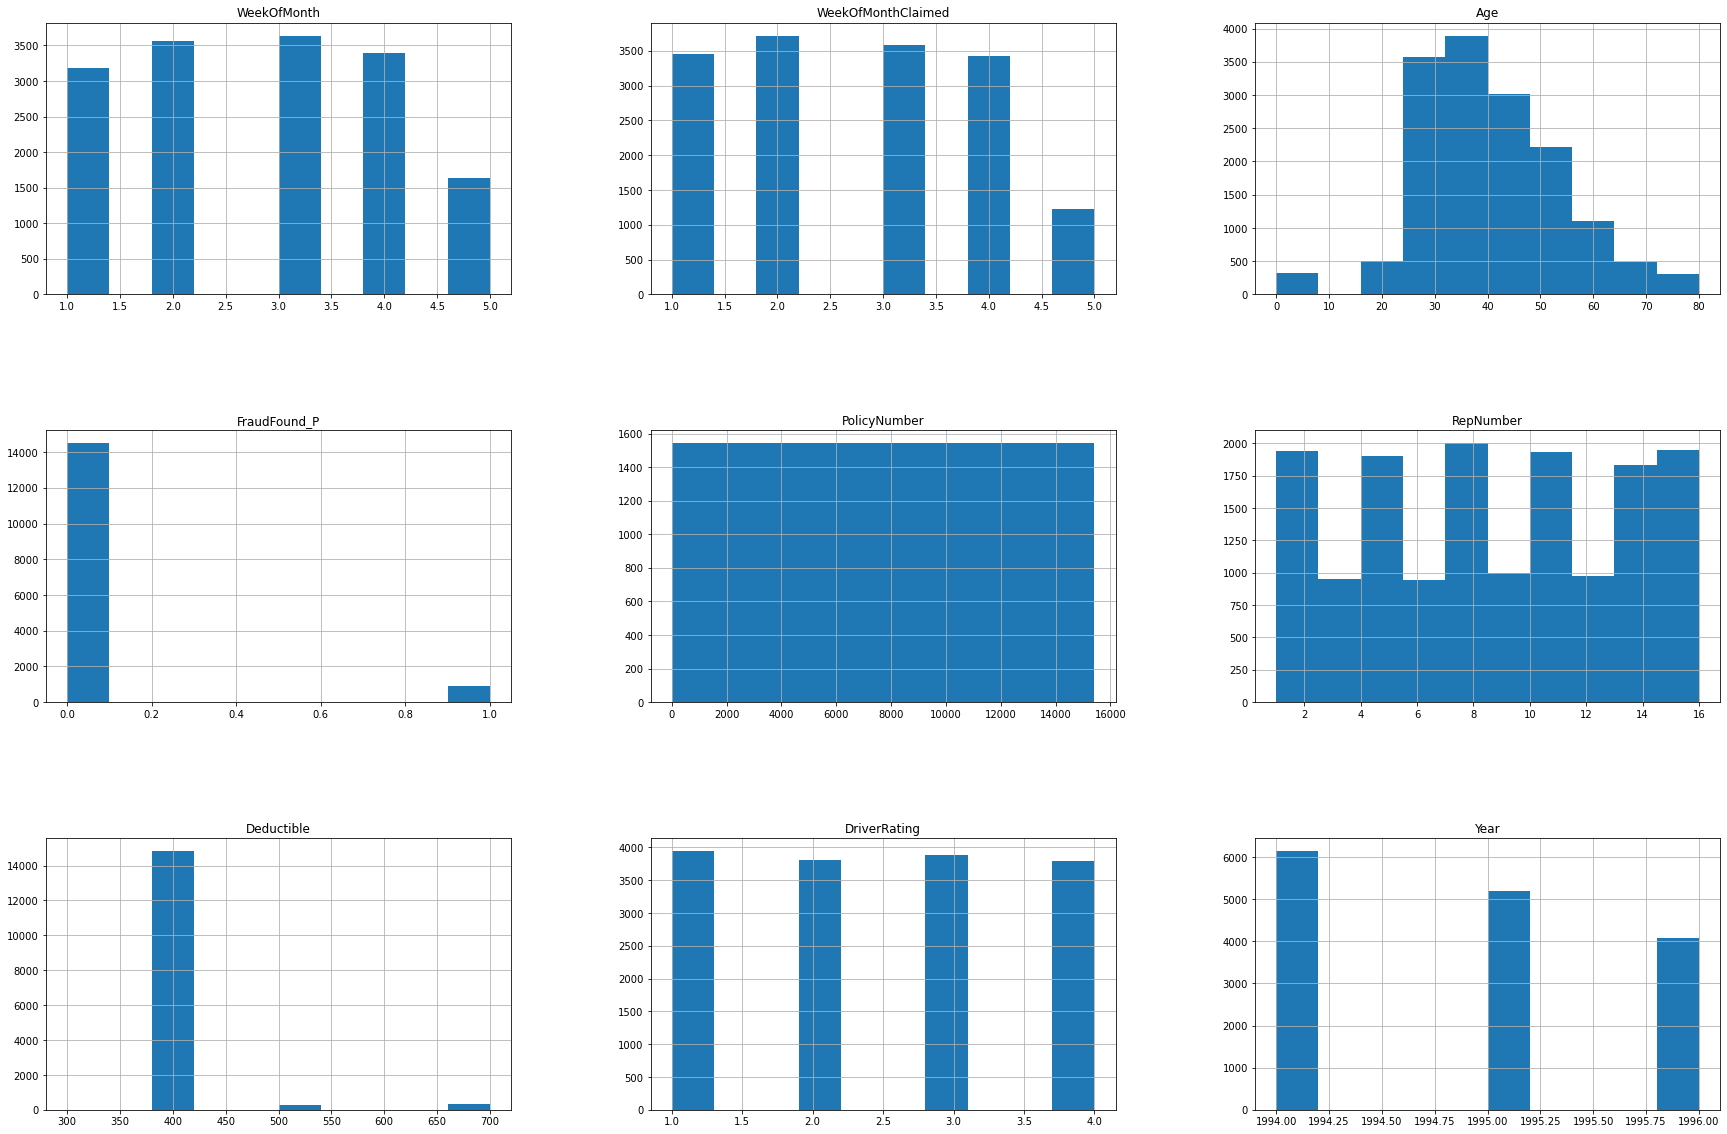

In [18]:
data.hist(figsize=(30,20))
plt.subplots_adjust(hspace=0.5);

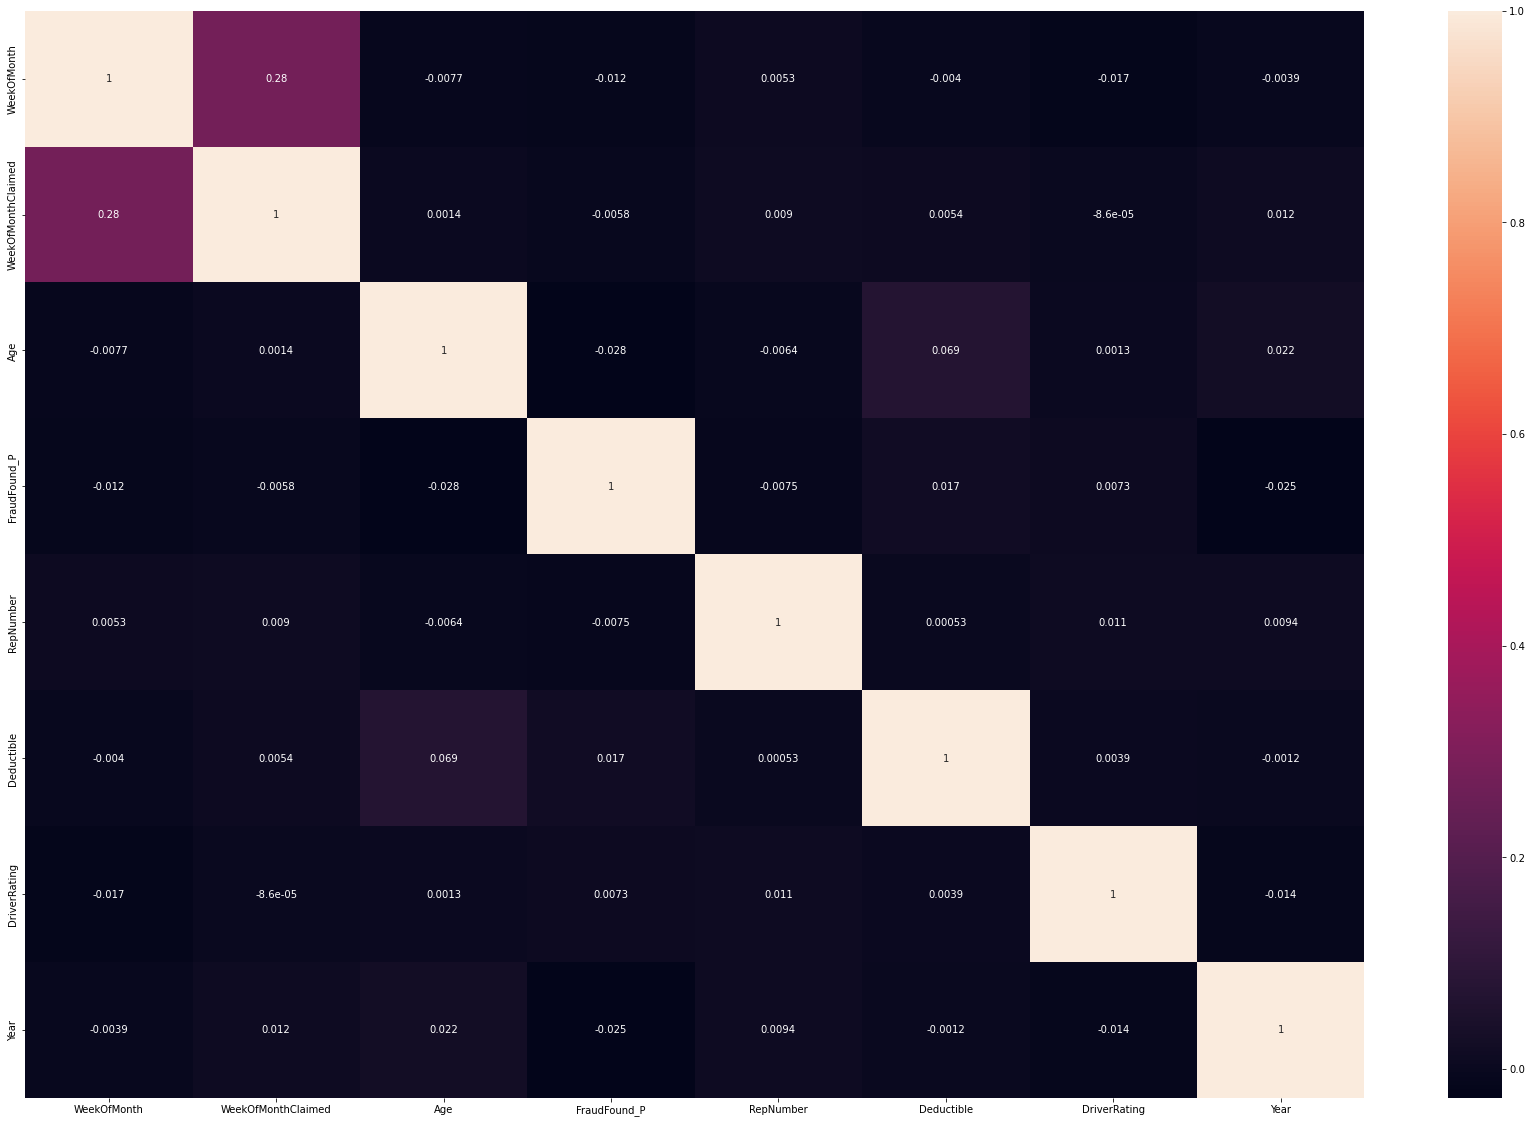

In [212]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(data.corr(), ax=ax, annot=True)
plt.show()

## Checking for categorical and numerical columns based on unique values.

In [11]:
data.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

## Checking coulmns
### checking foe categorical values in each column

In [14]:
for column in data:
    if column == 'PolicyNumber':
        pass
    else:
        print(column)
        print(sorted(data[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

###### DayOfWeekClaimed, MonthClaimed, and Age contains a 0
###### PolicyType is a concenation of VehicleCategory and BasePolicy
###### PolicyNumber just a row number


In [19]:
# Check DayOfWeekClaimed == 0
data[data['DayOfWeekClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [21]:
# Check MonthClaimed == 0
data[data['MonthClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [23]:
# Check Age == 0
print(data[data['Age']==0].shape)
data[data['Age']==0].sample(5)

(320, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
9540,Dec,3,Tuesday,Honda,Urban,Thursday,Apr,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1995,All Perils
7376,Dec,4,Thursday,Honda,Urban,Monday,Jul,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1995,All Perils
13183,Jun,2,Friday,Honda,Urban,Wednesday,Jun,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,All Perils
1419,May,1,Tuesday,Honda,Urban,Friday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
3044,Apr,4,Friday,Honda,Urban,Tuesday,Apr,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


<AxesSubplot:>

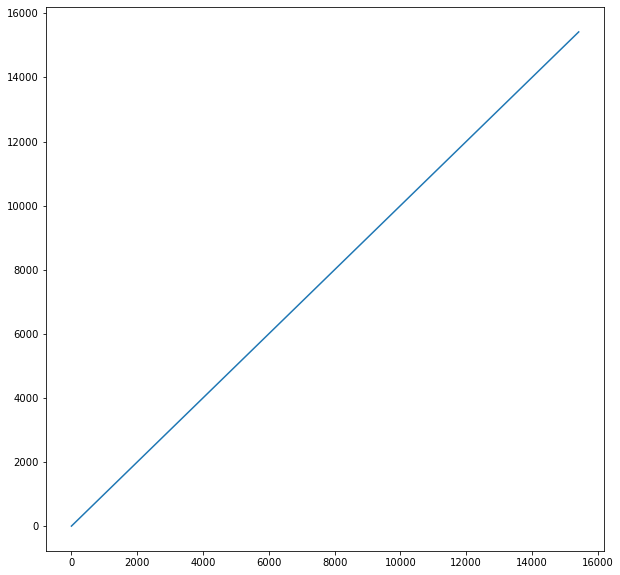

In [29]:
plt.figure(figsize=(10,10))
data.PolicyNumber.plot()

In [33]:
print(data[data['Age']==0]['AgeOfPolicyHolder'].unique()) 

['16 to 17']


In [34]:
data['Age'] = data['Age'].replace({0:16.5})

(array([ 695., 1996., 3958., 2441., 2206., 1942., 1000.,  747.,  208.,
         227.]),
 array([16. , 22.4, 28.8, 35.2, 41.6, 48. , 54.4, 60.8, 67.2, 73.6, 80. ]),
 <BarContainer object of 10 artists>)

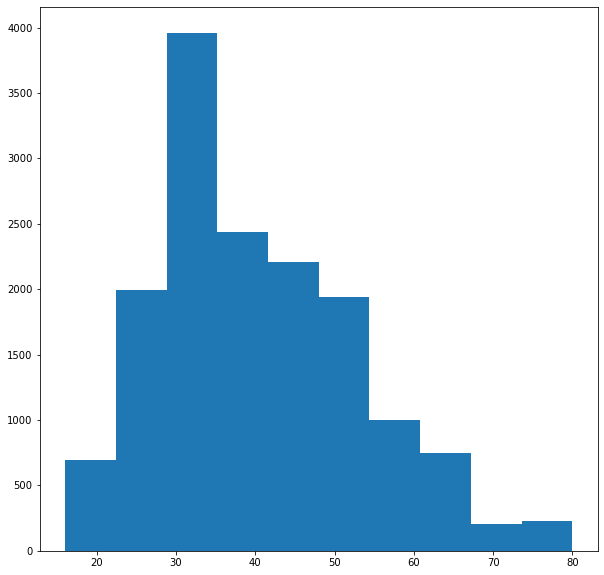

In [37]:
plt.figure(figsize=(10,10))
plt.hist(data['Age'])

In [38]:
#dropping Policy Number column as it has no impact
data=data.drop(columns='PolicyNumber')

In [42]:
# Drop DayOfWeekClaimed & MonthClaimed == 0, since the 0 in the same row and only one row, so we can drop it
data = data[~(data['MonthClaimed']=='0')]

In [40]:
data.shape

(15420, 32)

## checking FraudFound_P

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


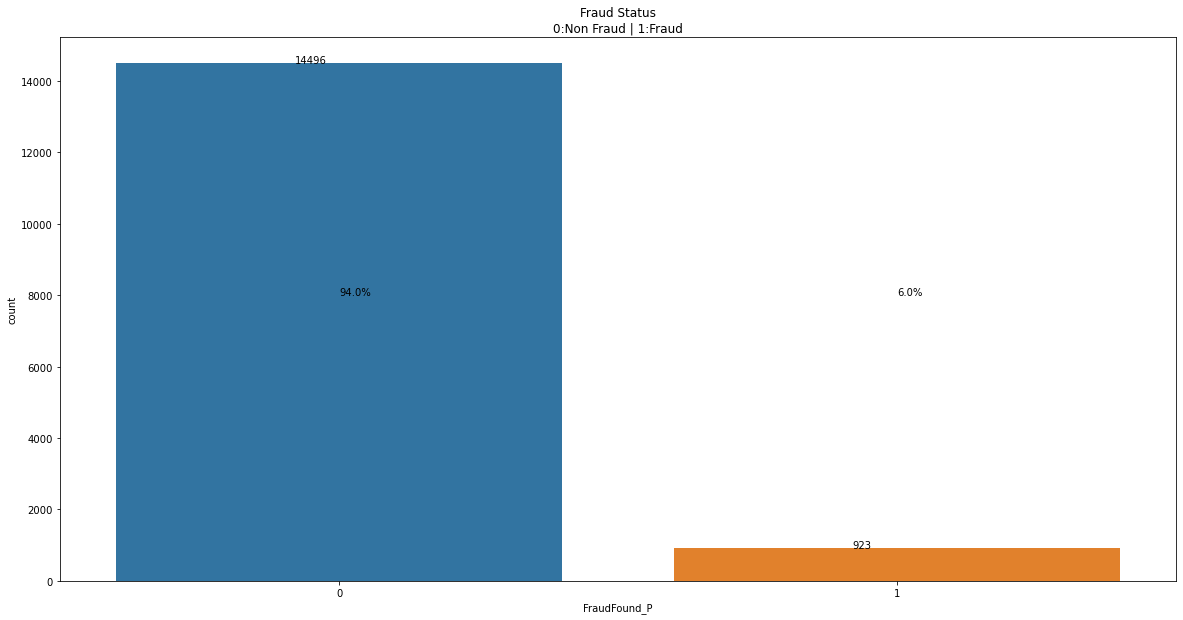

In [47]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data['FraudFound_P'],
                   order = data["FraudFound_P"].value_counts().index)

for p, label in zip(ax.patches, data["FraudFound_P"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.320, p.get_height()))
    
ax.set_title('Fraud Status\n0:Non Fraud | 1:Fraud')
ax.text(0, 8000, f'{round(14496/len(data),2)*100}%')
ax.text(1, 8000, f'{round(923/len(data),2)*100}%')
plt.show()

In [110]:
def plotBAR(coulmns ,target):
    
    fig, ax = plt.subplots(3,2, figsize=(30,20))

            
    order = sorted(data[coulmns[0]].unique())
    sns.countplot(data=data, x=coulmns[0], hue=target, order=order, ax=ax[0][0])
    ax[0][0].set_title(coulmns[0])
    
    order = sorted(data[coulmns[1]].unique())
    sns.countplot(data=data, x=coulmns[1], hue=target, order=order, ax=ax[0][1])
    ax[0][1].set_title(coulmns[1])
    
    order = sorted(data[coulmns[2]].unique())
    sns.countplot(data=data, x=coulmns[2], hue=target, order=order, ax=ax[1][0])
    ax[1][0].set_title(coulmns[2])
    
    order = sorted(data[coulmns[3]].unique())
    sns.countplot(data=data, x=coulmns[3], hue=target, order=order, ax=ax[1][1])
    ax[1][1].set_title(coulmns[3])
    
    order = sorted(data[coulmns[4]].unique())
    sns.countplot(data=data, x=coulmns[4], hue=target, order=order, ax=ax[2][0])
    ax[2][0].set_title(coulmns[4])
            
    order = sorted(data[coulmns[5]].unique())
    sns.countplot(data=data, x=coulmns[5], hue=target, order=order, ax=ax[2][1])
    ax[2][1].set_title(coulmns[5])
            

            
            
    
    plt.tight_layout()

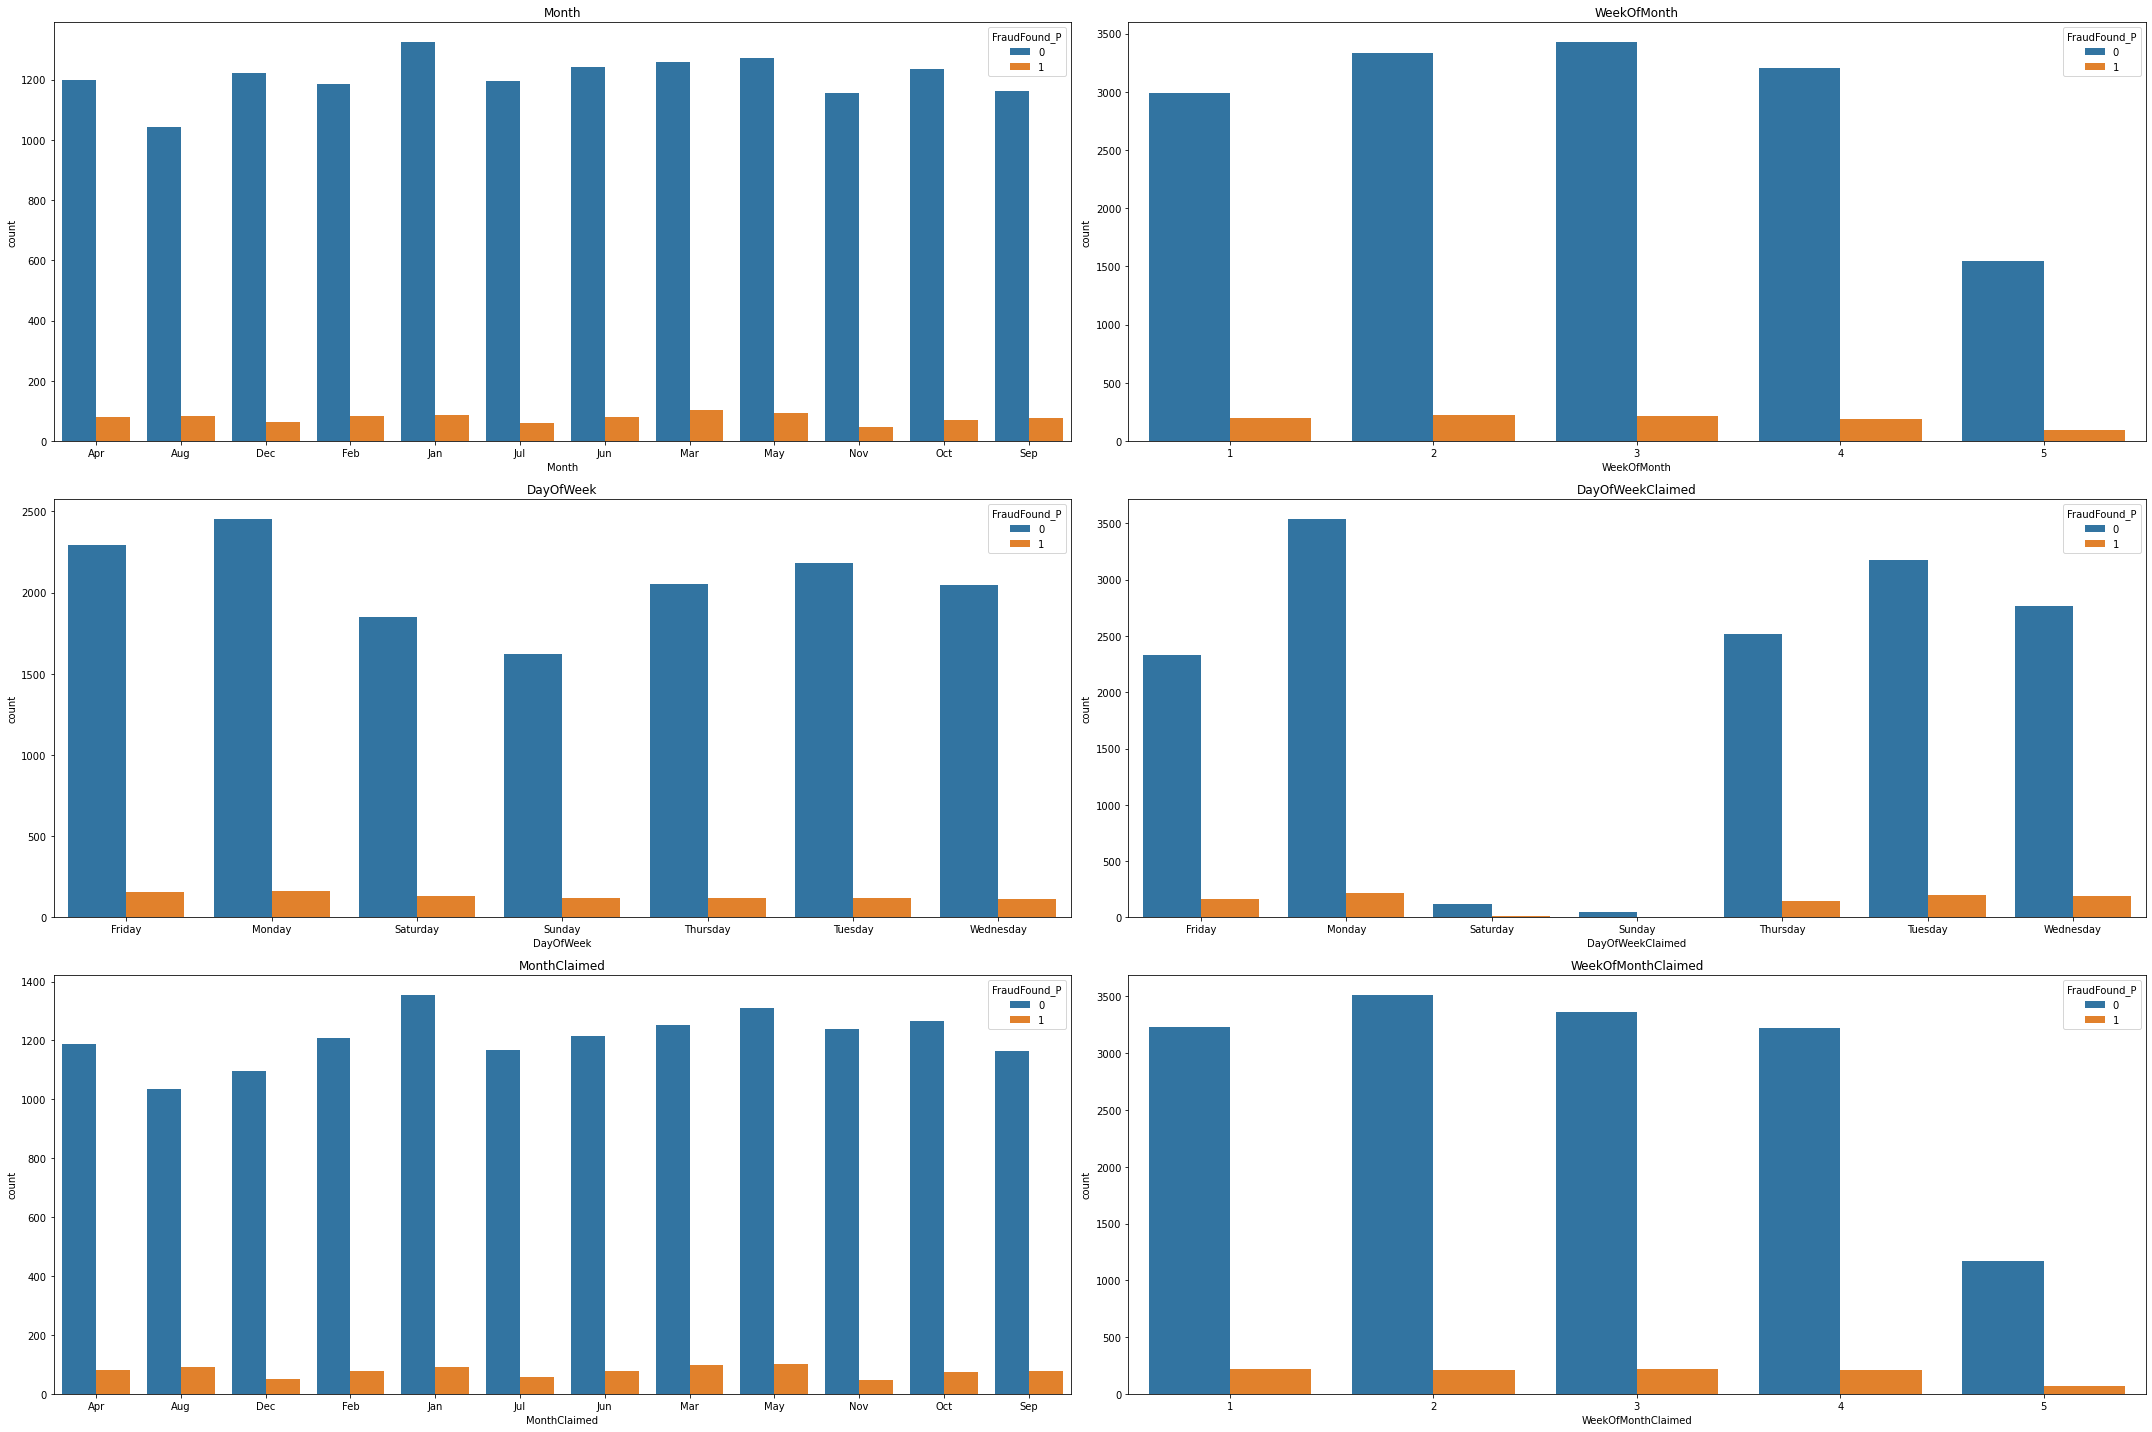

In [111]:
plotBAR(["Month","WeekOfMonth" ,"DayOfWeek" ,"DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed"], data['FraudFound_P'])

Checking days and month , ...

Text(0.5, 1.0, 'Age')

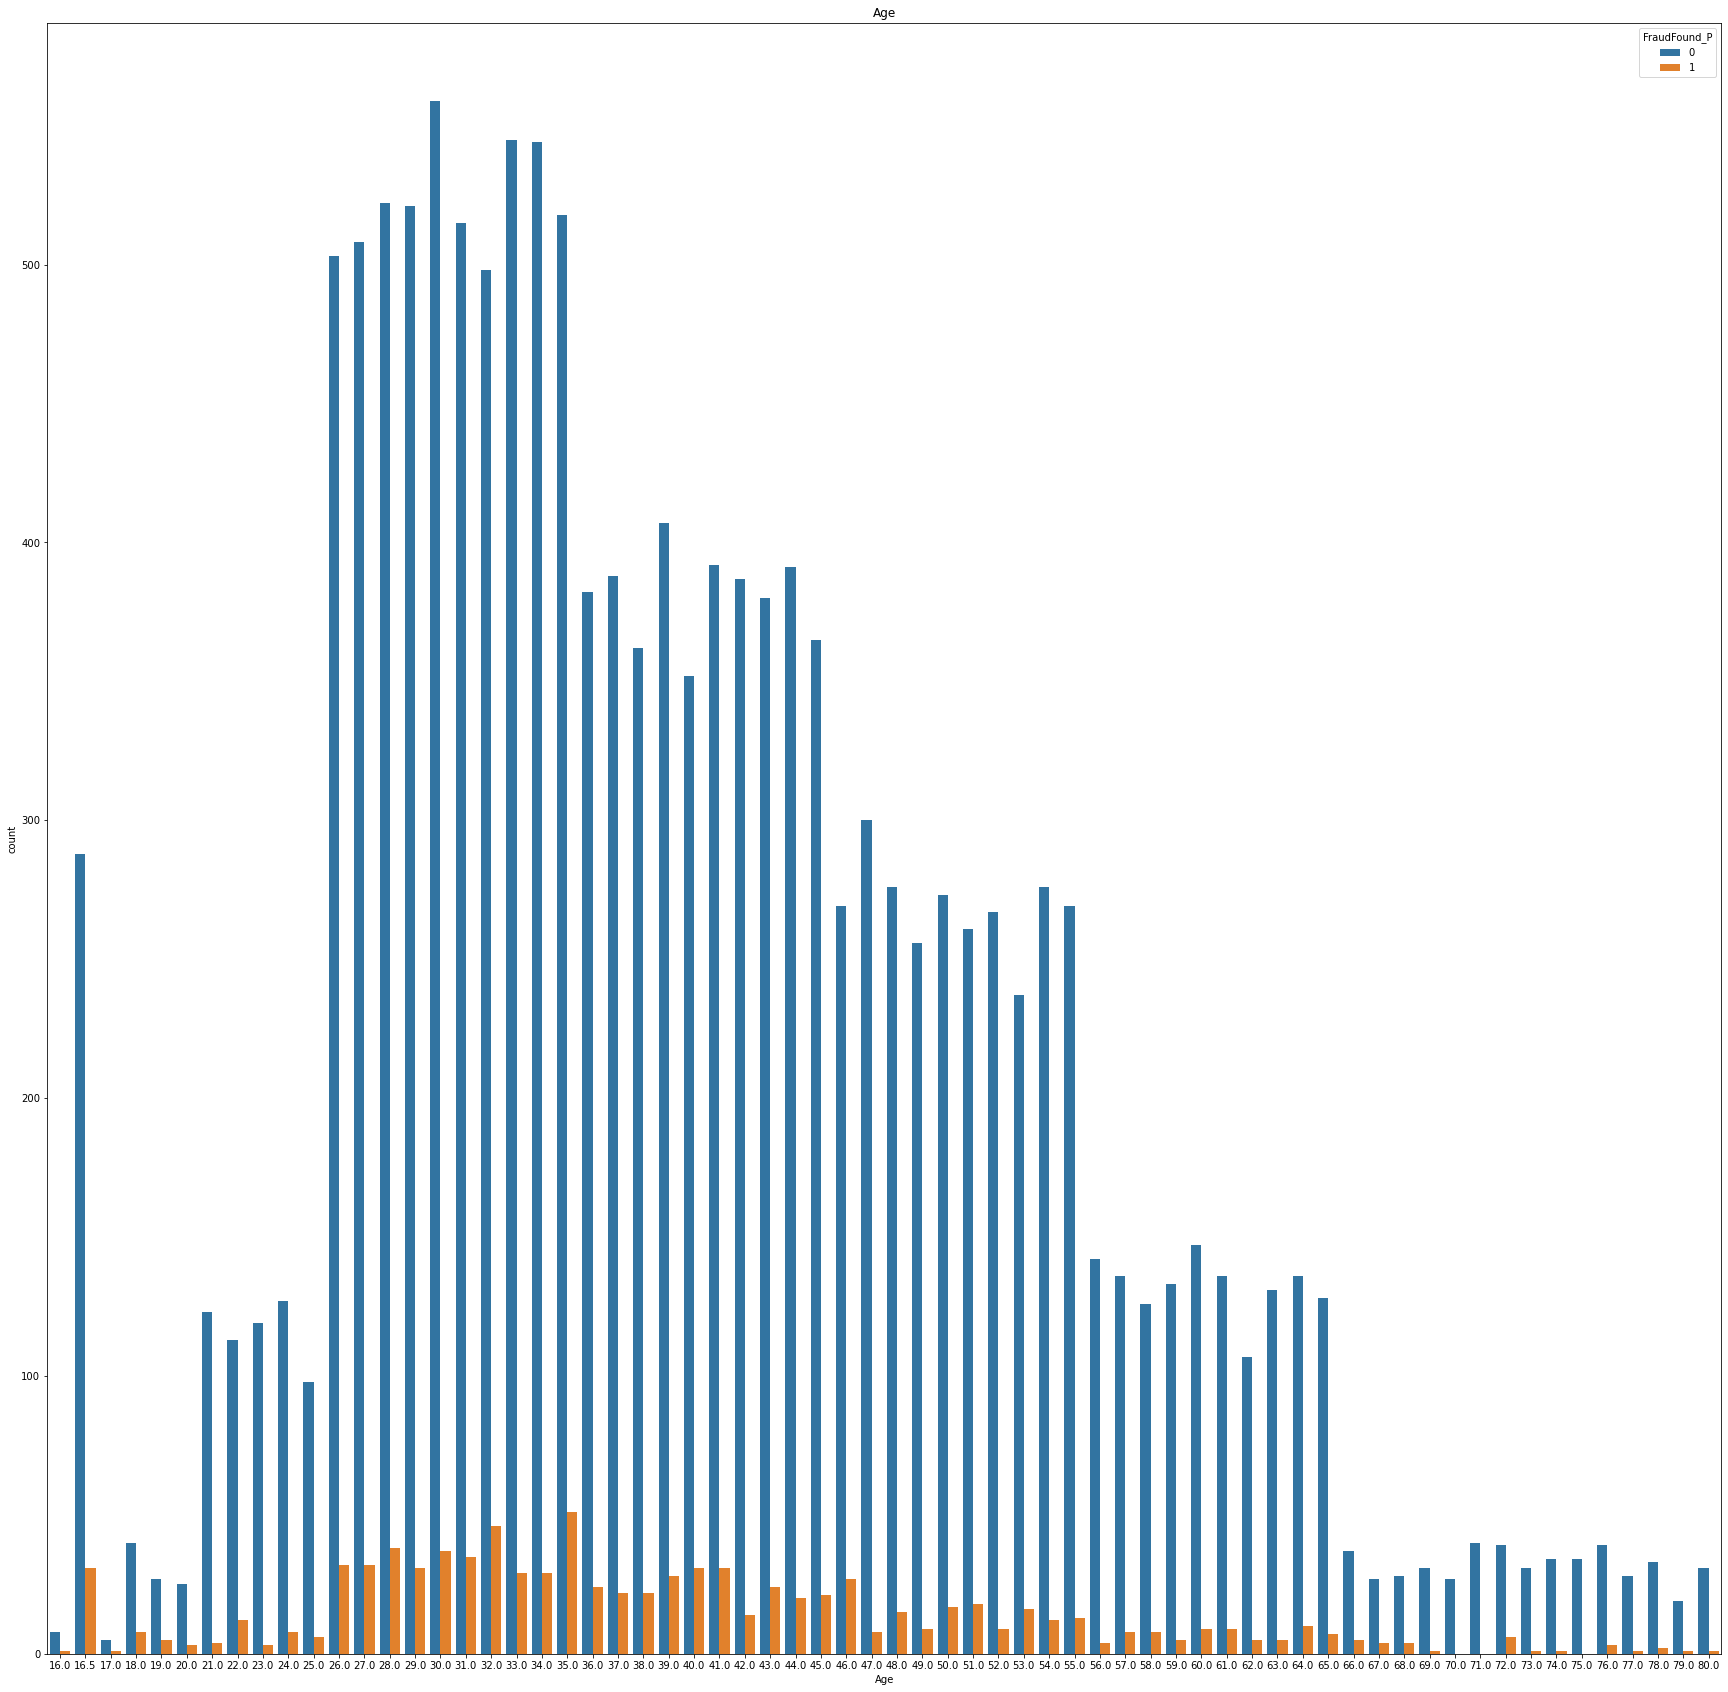

In [168]:
plt.figure(figsize=(30,30))
order = sorted(data["Age"].unique())
sns.countplot(data=data, x="Age", hue=data["FraudFound_P"], order=order)
plt.title("Age")

In [183]:
def plotPieAndBar(column ,target):
       
   order = sorted(data[column[0]].unique())
       
    
   plt.figure(figsize=(30,15))
   
   plt.subplot(121)
   sns.countplot(data=data, x=column[0], hue=target, order=order)
   plt.title(column[0])
   
   plt.subplot(122)
   plt.title(column[0])
   plt.pie(data[column[0]].value_counts()  ,labels=order , autopct = '%1.2f%%')

  
    

In [205]:
def displayPlotPieAndBar(columns ,target):
    for column in columns:
        plotPieAndBar([column] ,data[target])
        

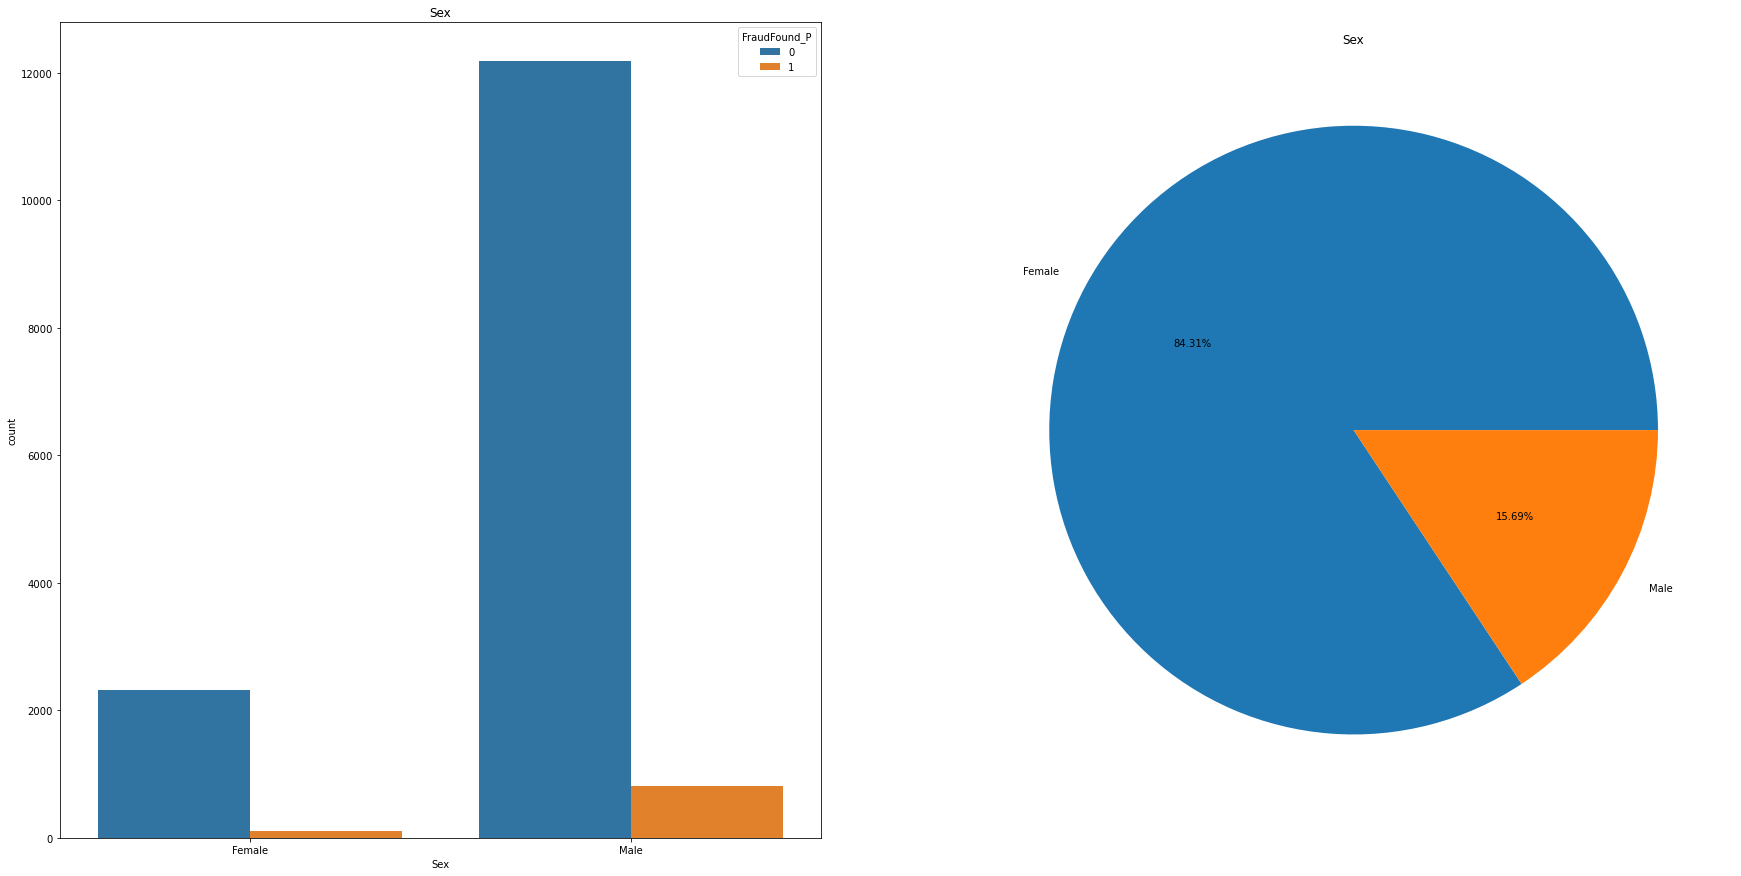

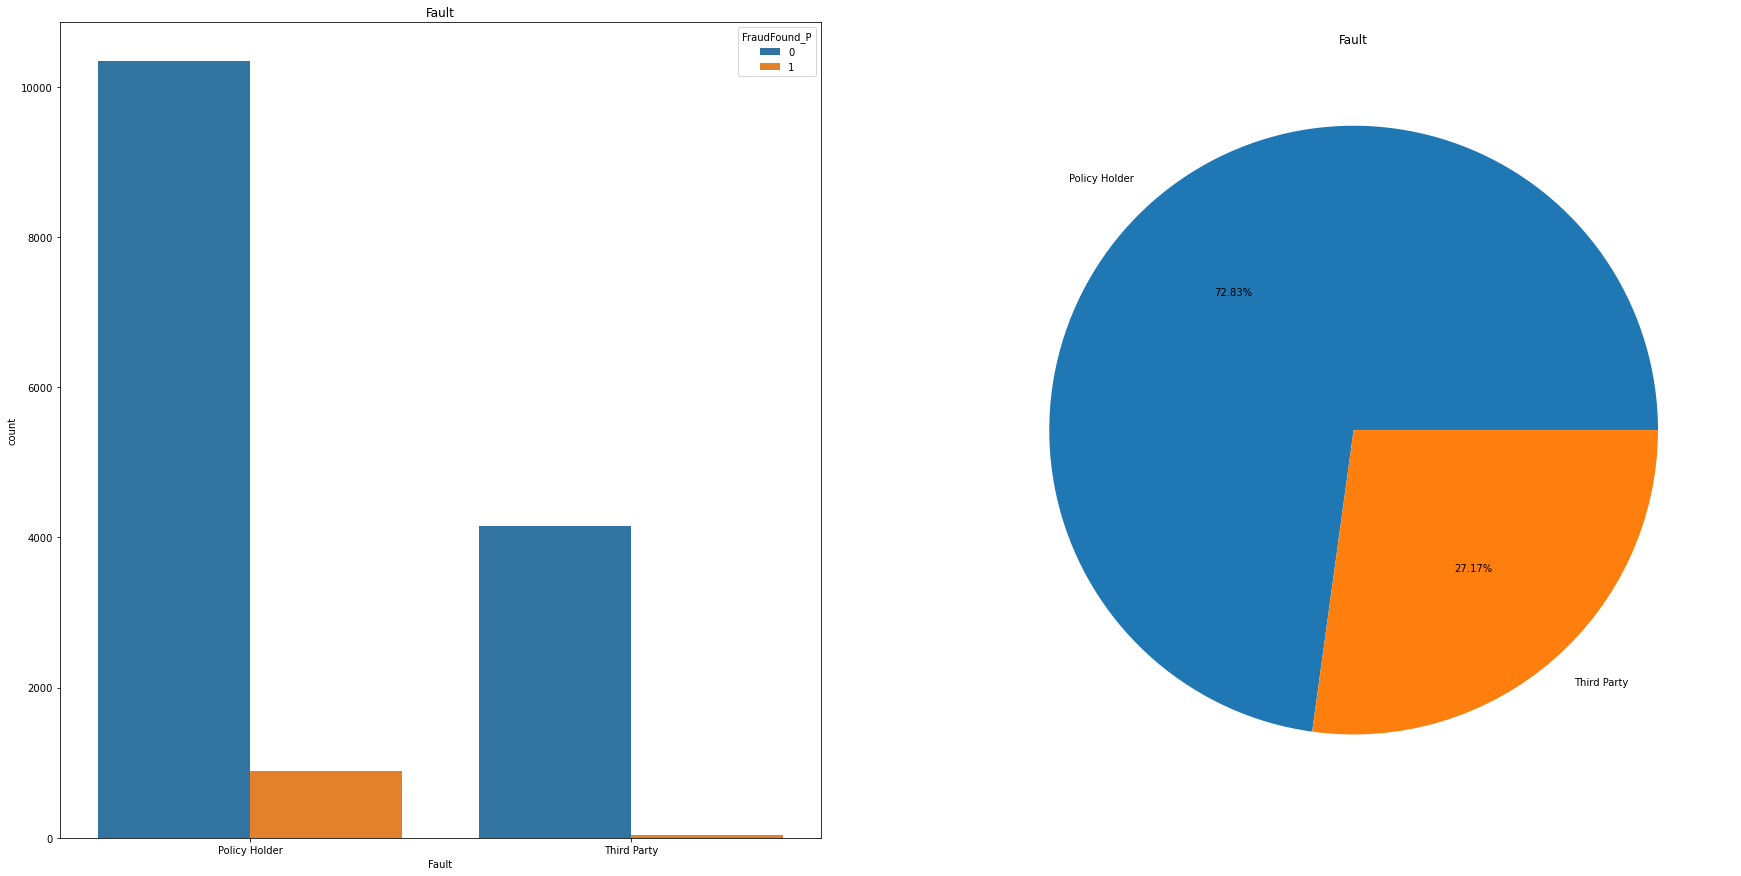

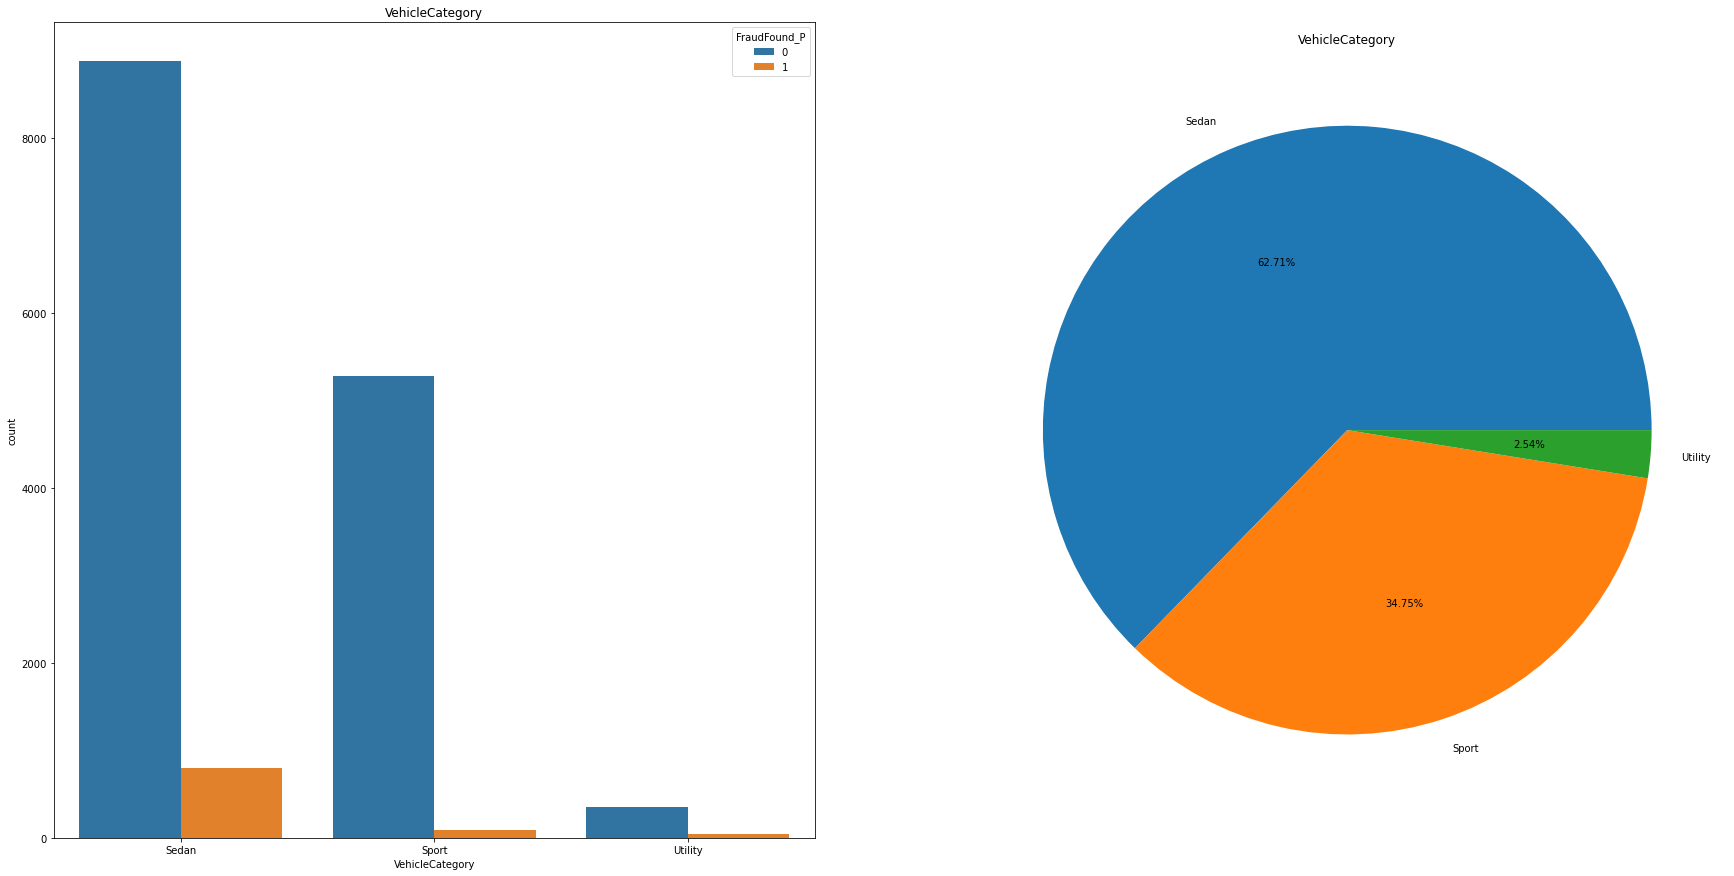

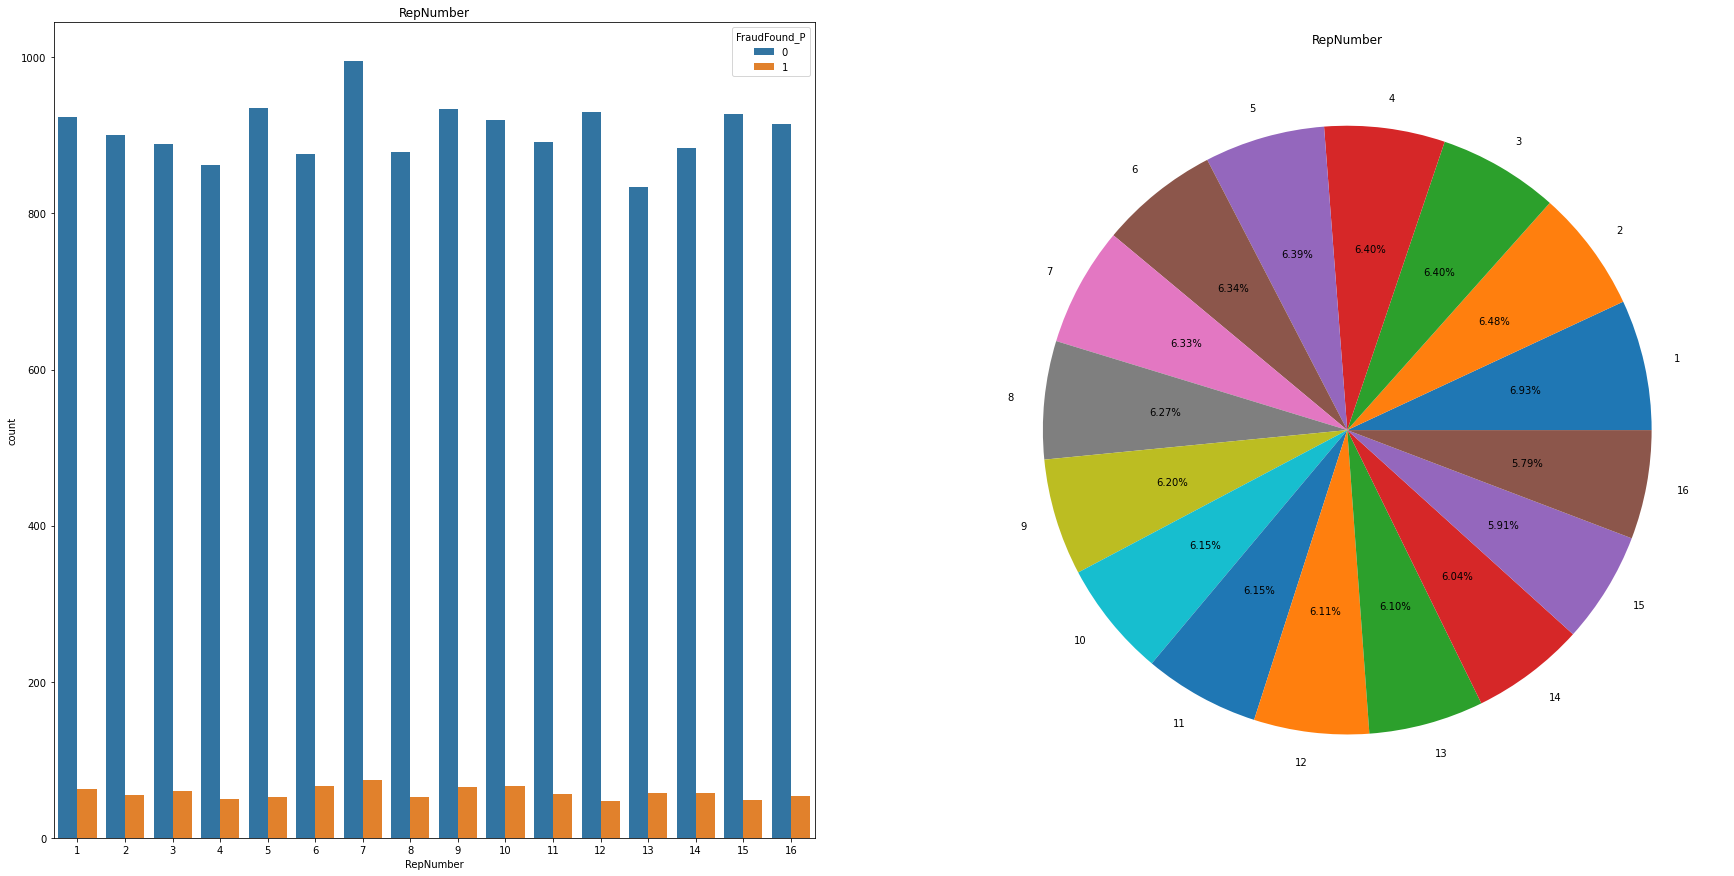

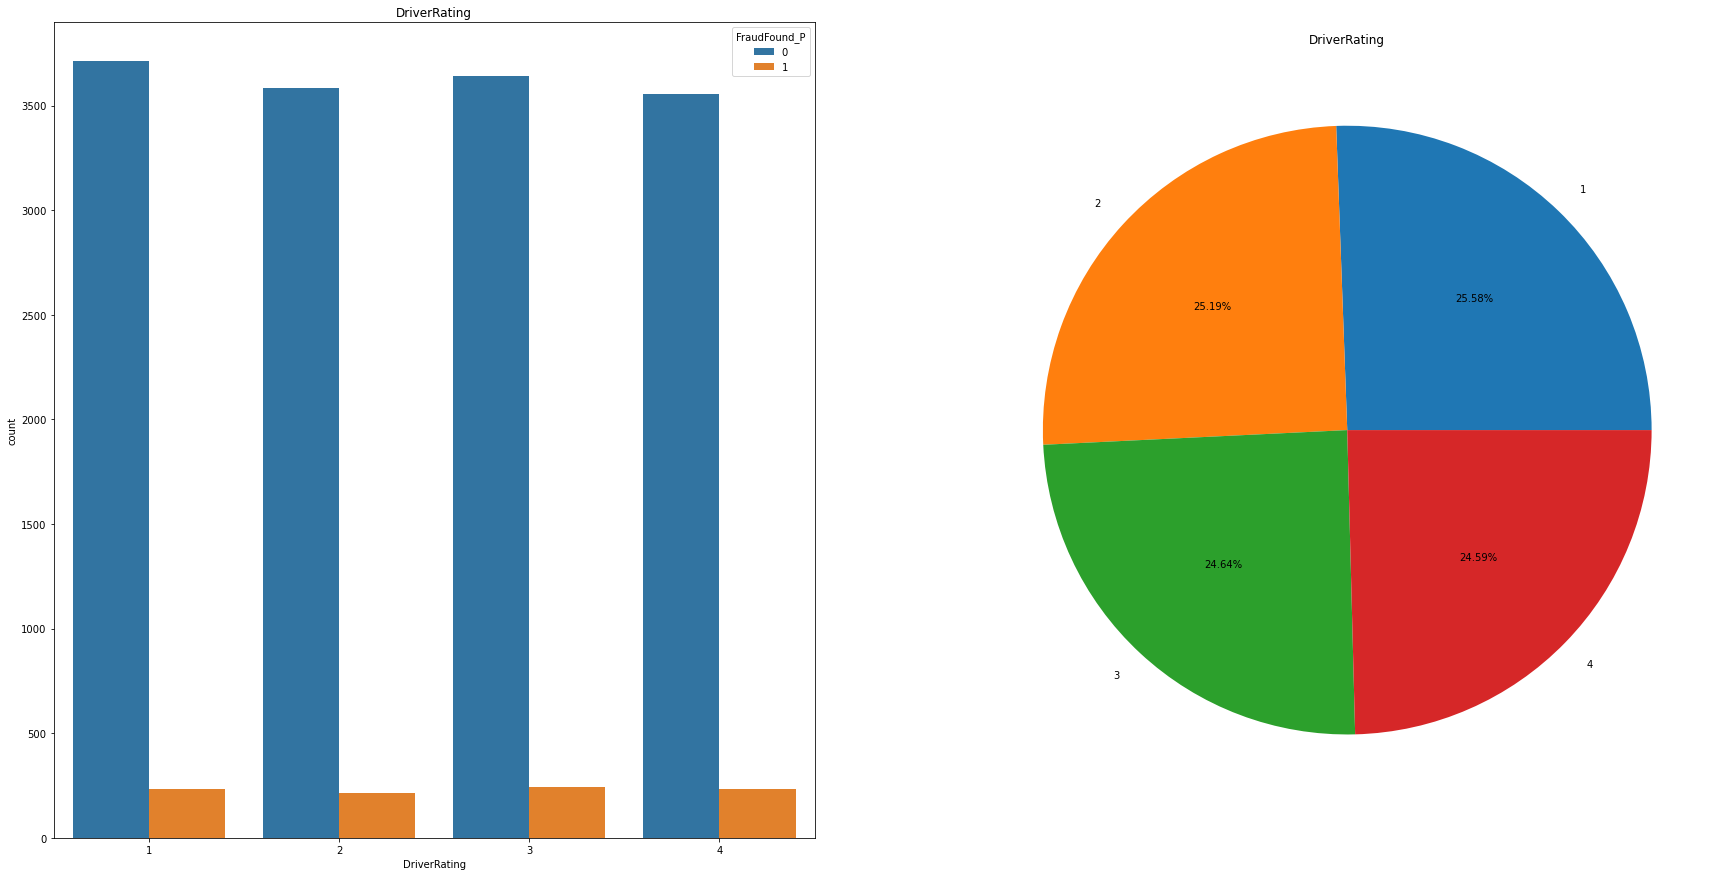

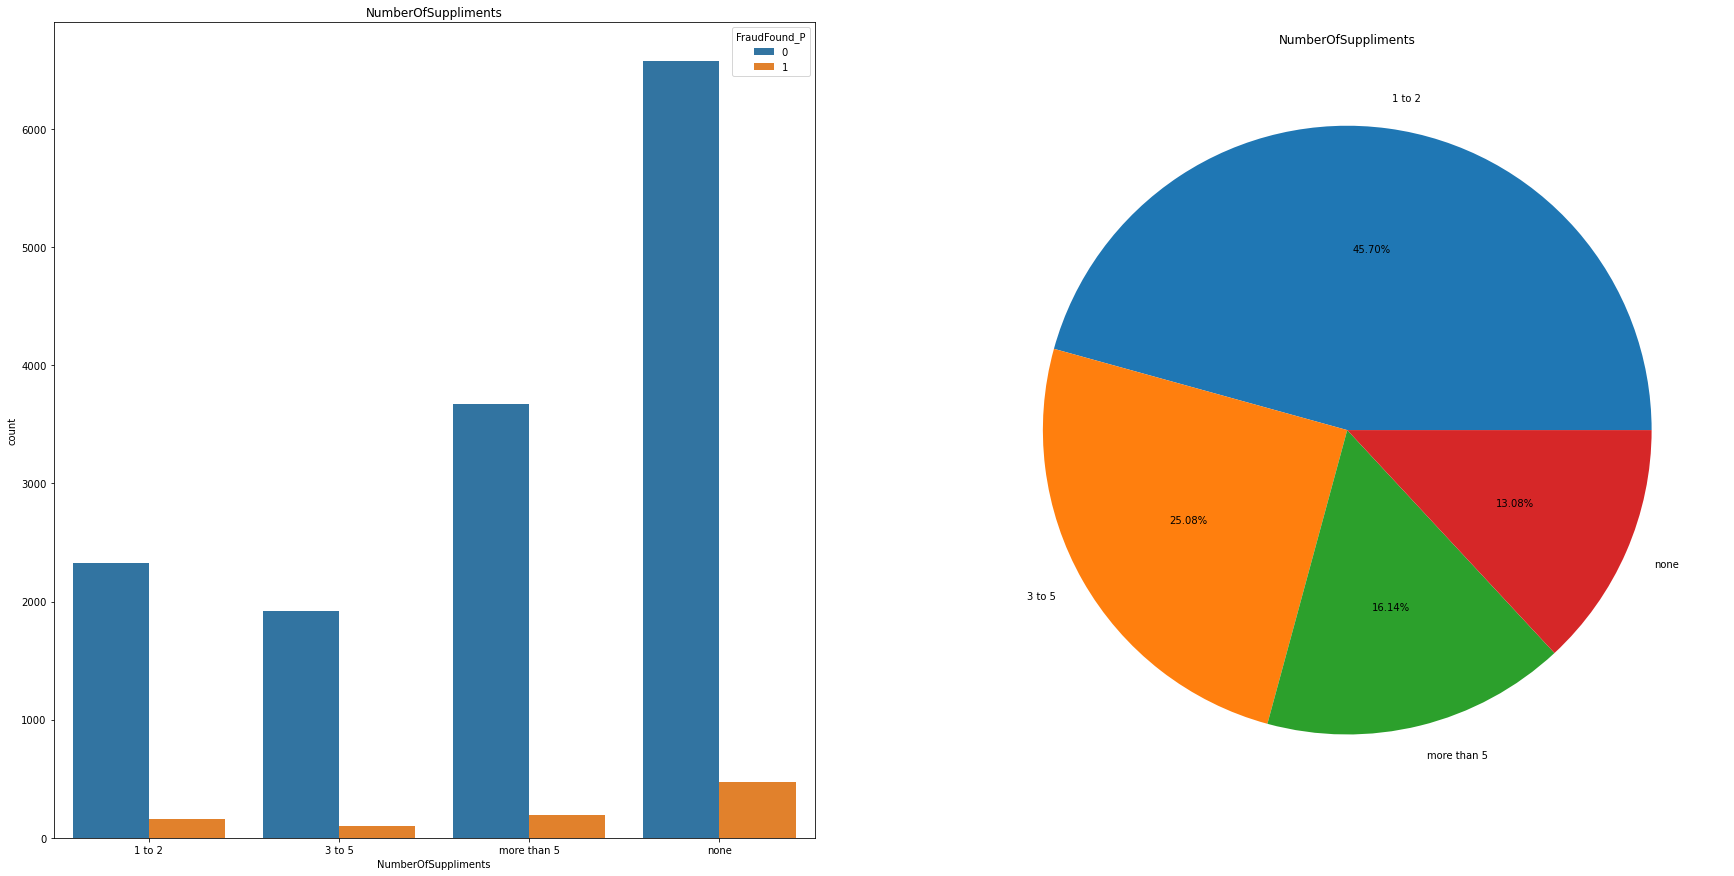

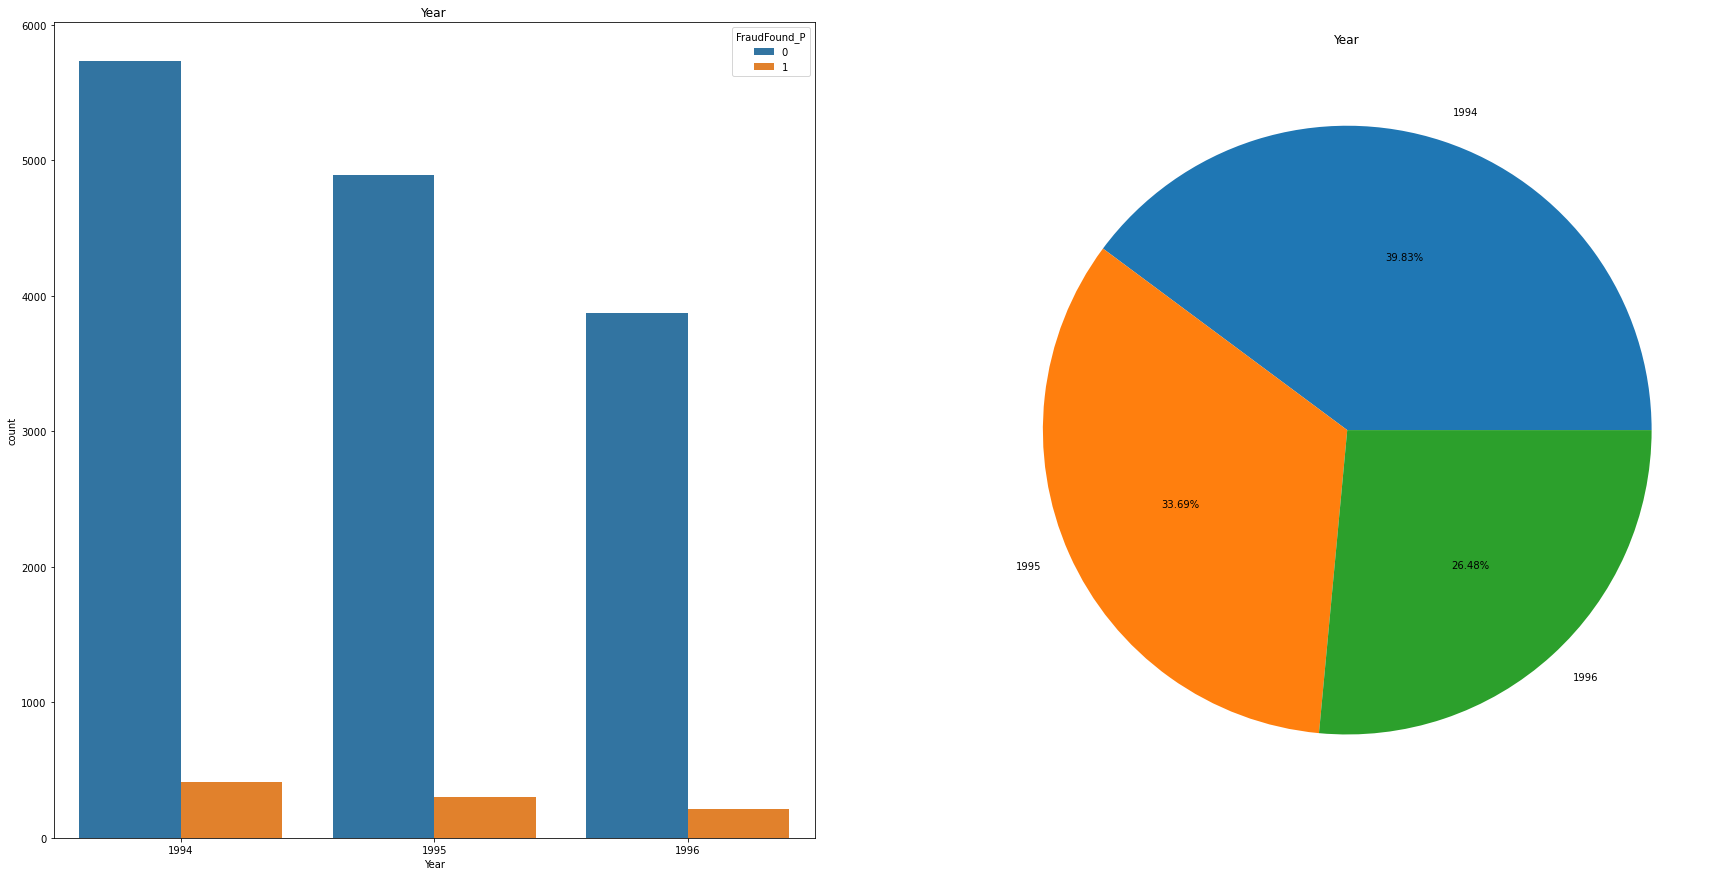

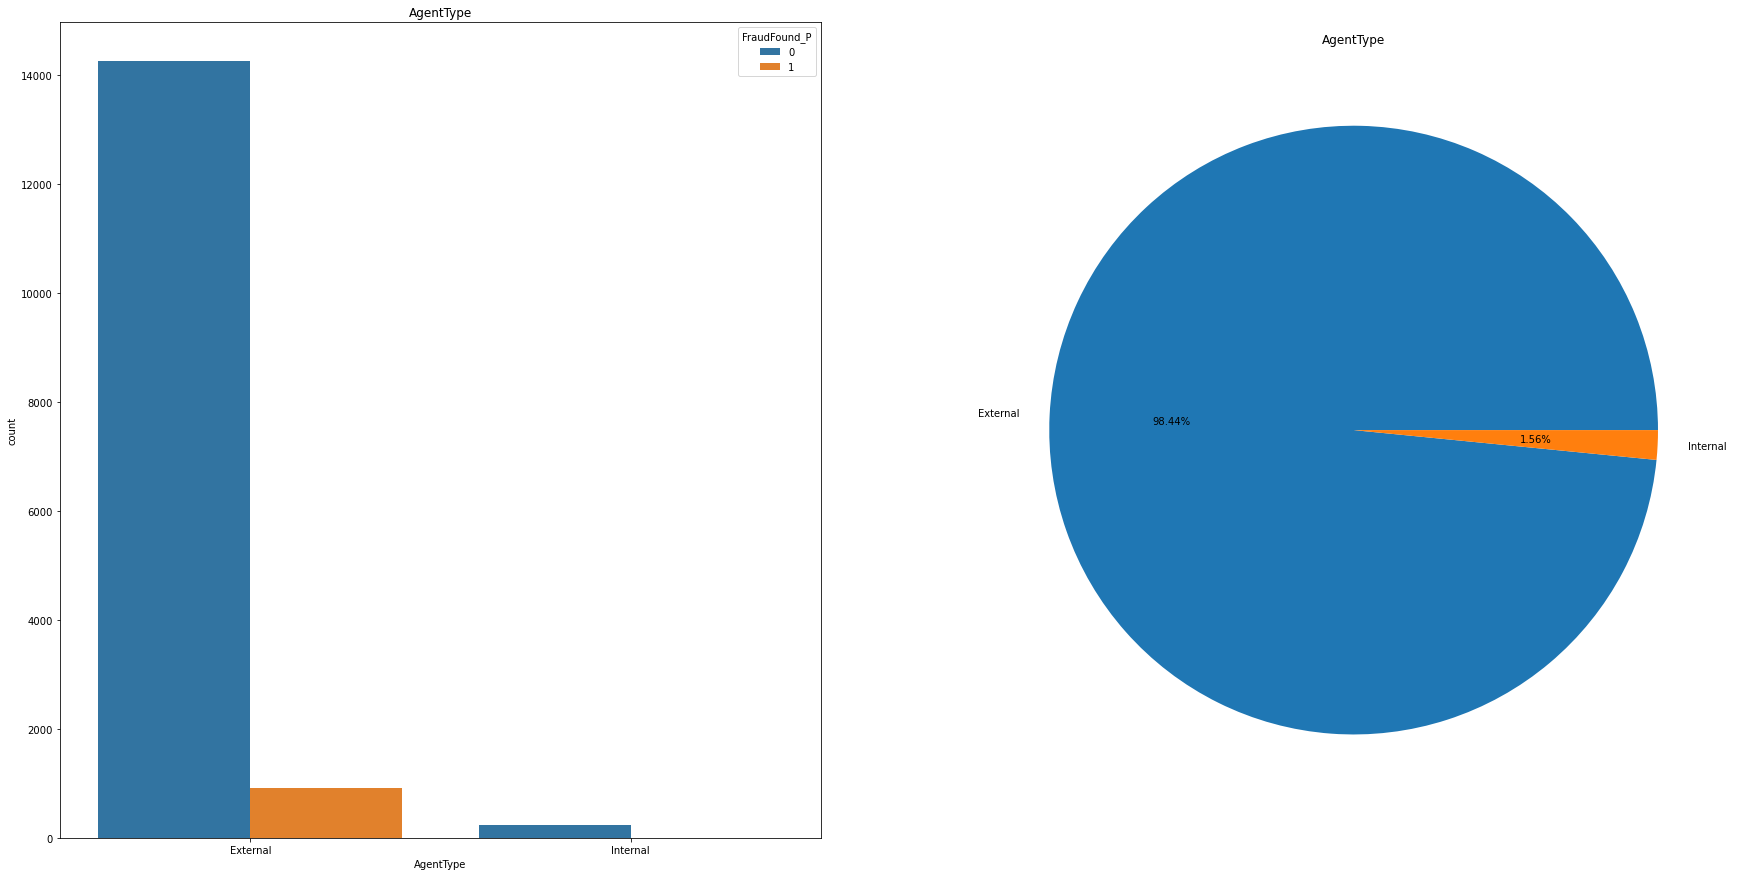

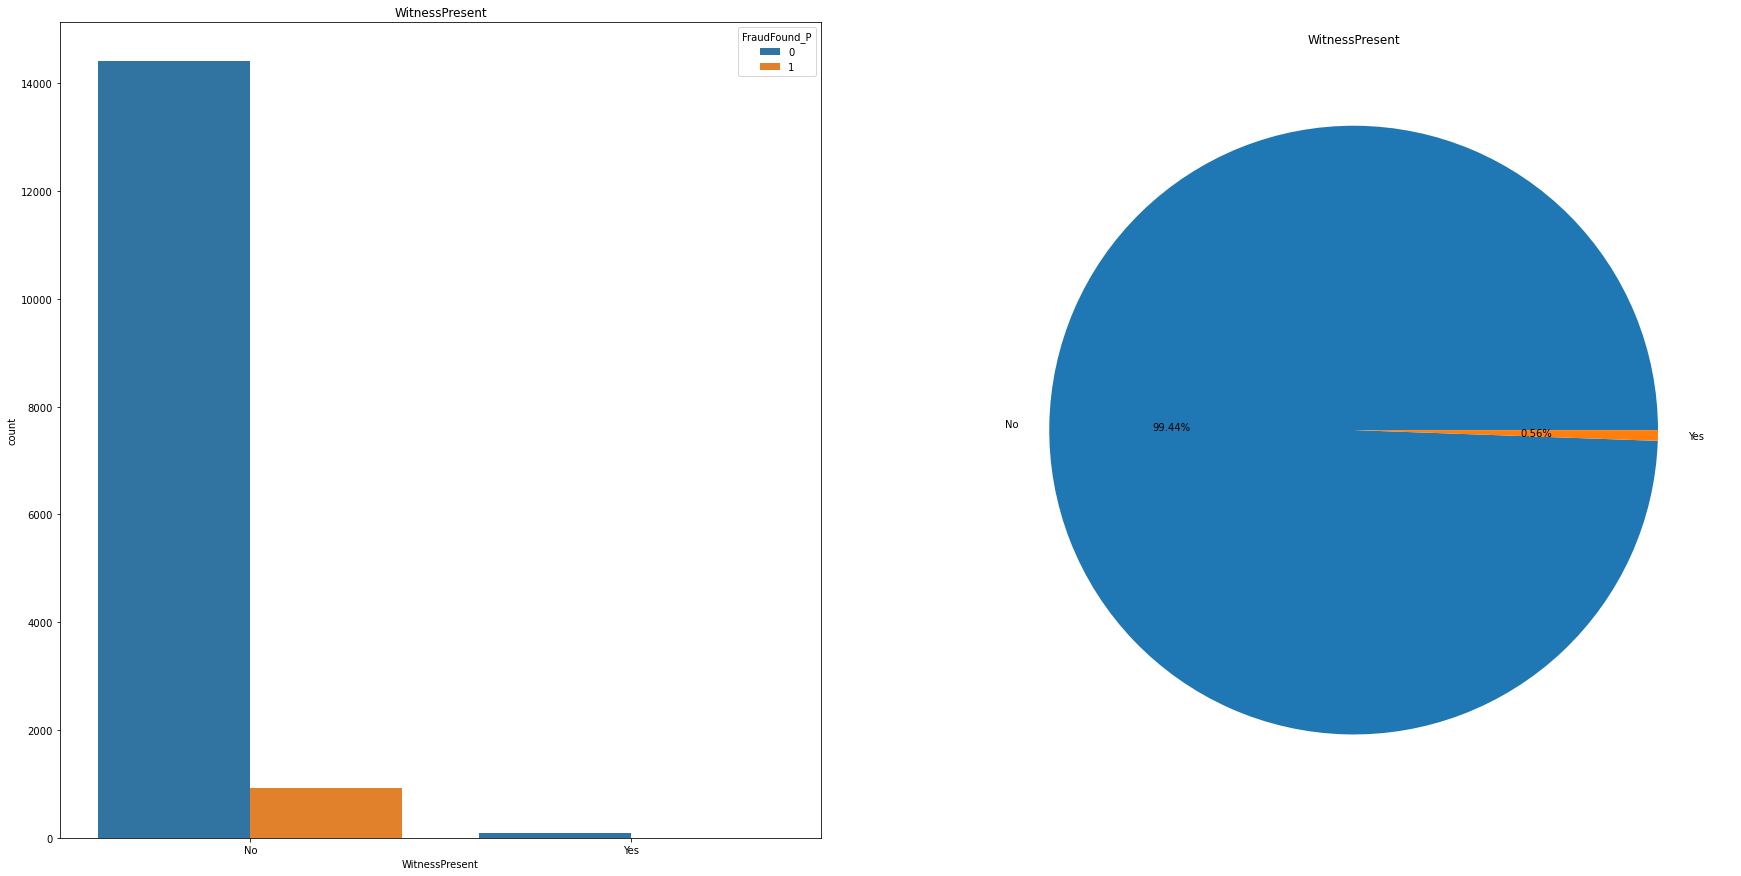

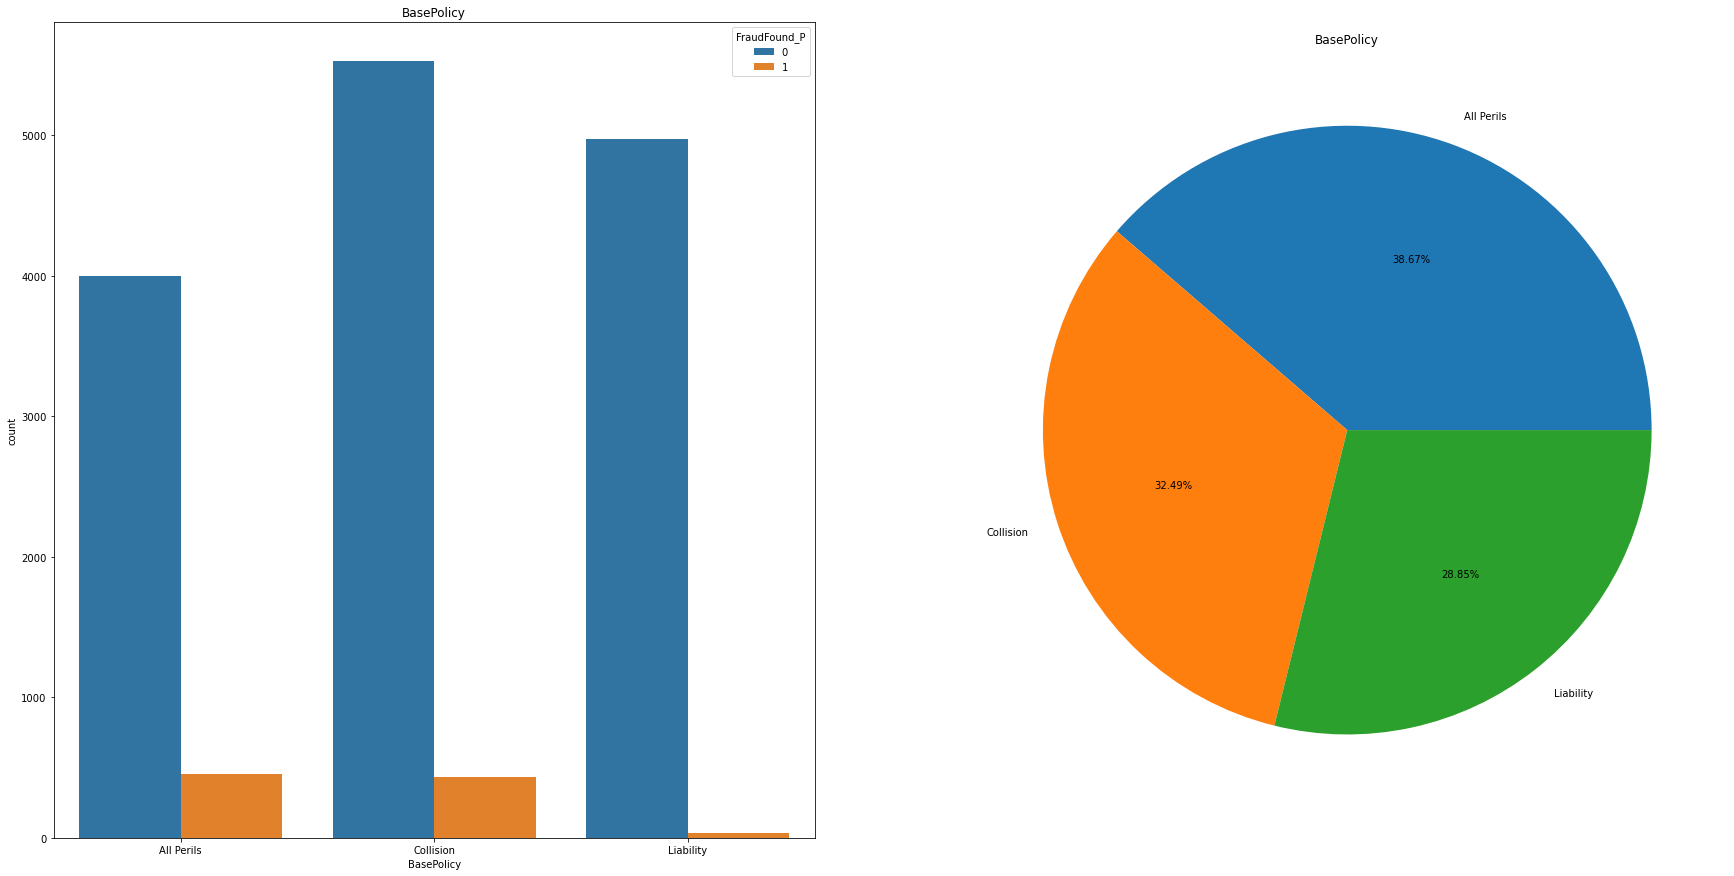

In [206]:
displayPlotPieAndBar(["Sex" ,"Fault" ,"VehicleCategory", "RepNumber" ,"DriverRating" ,"NumberOfSuppliments" ,"Year" ,"AgentType" ,"WitnessPresent" ,"BasePolicy"],"FraudFound_P")

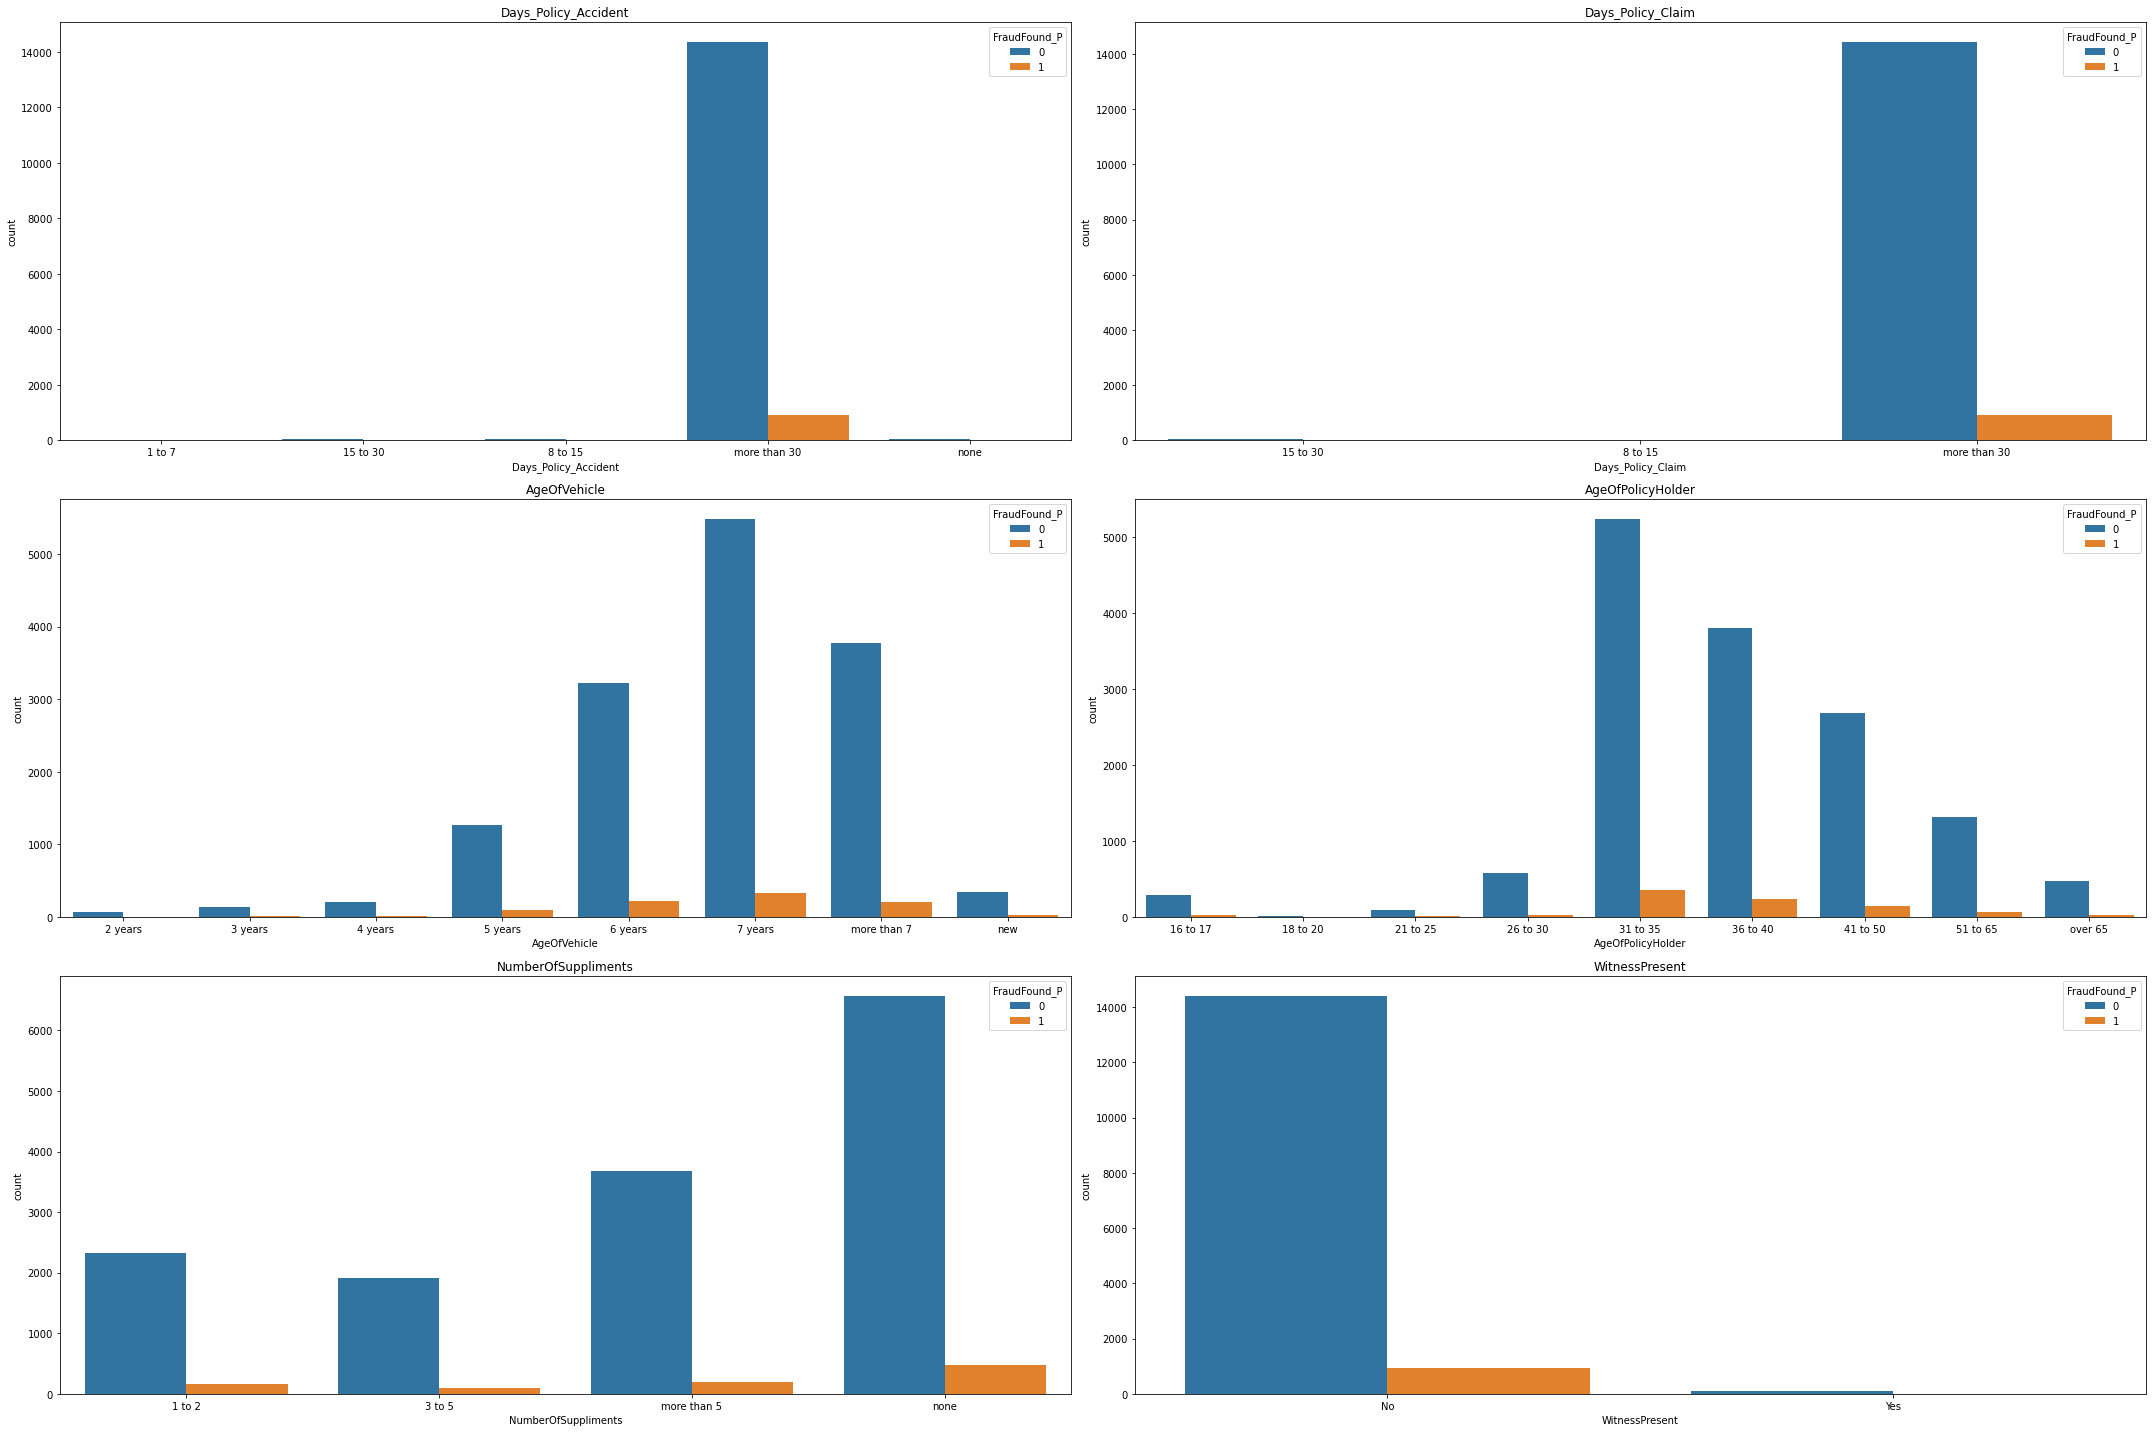

In [209]:
plotBAR(['Days_Policy_Accident' ,'Days_Policy_Claim' ,'AgeOfVehicle' ,'AgeOfPolicyHolder' ,'NumberOfSuppliments' ,'WitnessPresent'] ,"FraudFound_P")

# PreProcessing

In [228]:
LB = preprocessing.LabelEncoder()
for column in (data.columns):
    data[column] = LB.fit_transform(data[column])

data.shape

(15419, 32)

In [229]:
data.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,4,6,6,1,5,4,0,0,2,...,1,3,0,0,0,3,0,2,0,2
1,4,2,6,6,1,1,4,3,1,2,...,4,4,1,0,0,3,3,0,0,1
2,10,4,0,6,1,4,9,1,1,1,...,5,6,0,0,0,3,3,0,0,1
3,6,1,2,17,0,0,5,0,1,1,...,6,7,1,0,0,2,3,0,0,2
4,4,4,1,6,1,5,3,1,0,2,...,3,4,0,0,0,3,3,0,0,1
5,10,3,0,6,1,6,9,0,1,2,...,3,2,0,0,0,1,3,0,0,1
6,3,0,2,6,1,1,3,2,1,1,...,5,5,0,0,0,0,3,0,0,1
7,9,0,0,6,1,5,7,3,1,2,...,7,0,0,0,0,3,3,0,0,1
8,2,3,2,6,1,6,2,4,1,2,...,4,4,0,1,0,1,3,0,0,1
9,0,2,5,5,1,6,0,2,1,1,...,6,5,0,0,0,1,3,0,0,0


# Set Dataset

In [251]:
X = data.drop(columns='FraudFound_P') #independent #input
y = data['FraudFound_P'] #dependent #output

In [252]:
gneralX_train, gneralX_test, gneraly_train, gneraly_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [253]:
gneraly_train.value_counts()

0    10156
1      637
Name: FraudFound_P, dtype: int64

In [254]:
gneraly_test.value_counts()

0    4340
1     286
Name: FraudFound_P, dtype: int64

In [255]:
oversample = SMOTE(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(gneralX_train, gneraly_train)
print('After Oversampling:\n',y_over.value_counts())

After Oversampling:
 0    10156
1     5078
Name: FraudFound_P, dtype: int64


In [256]:
undersampel = RandomUnderSampler(sampling_strategy=0.5 ,random_state=42)
X_under ,y_under = undersampel.fit_resample(gneralX_train, gneraly_train)
print('After Oversampling:\n',y_over.value_counts())

After Oversampling:
 0    10156
1     5078
Name: FraudFound_P, dtype: int64


In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [305]:
def scorForTest(yTrian ,y):
    print("TEST DATA : ")
    print("accuracy_score for test data : " + str(accuracy_score(y ,yTrian)))
    print("recall_score for test data : " + str(recall_score(y ,yTrian)))
    print("precision_score for test data : " + str(precision_score(y ,yTrian)))
    print("f1_score for test data : " + str(f1_score(y ,yTrian)))
    print("roc_auc_score for test data : " + str(roc_auc_score(y ,yTrian)))
    
    
    fpr, tpr, thresholds = roc_curve(y ,yTrian)
    
    x = np.linspace(0, 1, 1000)
    
    
    #plt.figure(figsize=(10,10))
    #plt.subplot(121)
    #plt.plot(fpr ,tpr)
    #plt.plot(x ,x)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    #plt.title("ROC")
    
    cm =  confusion_matrix(y ,yTrian)
    
    cmDisply = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=[False ,True])
    fig, (ax1 ,ax2) = plt.subplots(1 , 2 ,figsize=(15,15))
    
    ax1.plot(fpr ,tpr)
    ax1.plot(x ,x)
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    ax1.set_title("ROC")

    
    
    
    cmDisply.plot(ax=ax2)
    plt.show()
    

In [312]:
def scorForTrain(yTrian ,y):
    print("Train DATA : ")
    print("accuracy_score for Train data : " + str(accuracy_score(y ,yTrian)))
    print("recall_score for Train data : " + str(recall_score(y ,yTrian)))
    print("precision_score for Train data : " + str(precision_score(y ,yTrian)))
    print("f1_score for Train data : " + str(f1_score(y ,yTrian)))
    print("roc_auc_score for Train data : " + str(roc_auc_score(y ,yTrian)))
    
    
    fpr, tpr, thresholds = roc_curve(y ,yTrian)
    
    x = np.linspace(0, 1, 1000)
    
    
    cm =  confusion_matrix(y ,yTrian)
    
    cmDisply = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=[False ,True])
    fig, (ax1 ,ax2) = plt.subplots(1 , 2 ,figsize=(15,15))
    
    ax1.plot(fpr ,tpr)
    ax1.plot(x ,x)
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    ax1.set_title("ROC")

    
    
    
    cmDisply.plot(ax=ax2)
    plt.show()
    

## Logistic Regression

### Imbalanc Data

TEST DATA : 
accuracy_score for test data : 0.9409802649865654
recall_score for test data : 0.0
precision_score for test data : 0.0
f1_score for test data : 0.0
roc_auc_score for test data : 0.5


/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


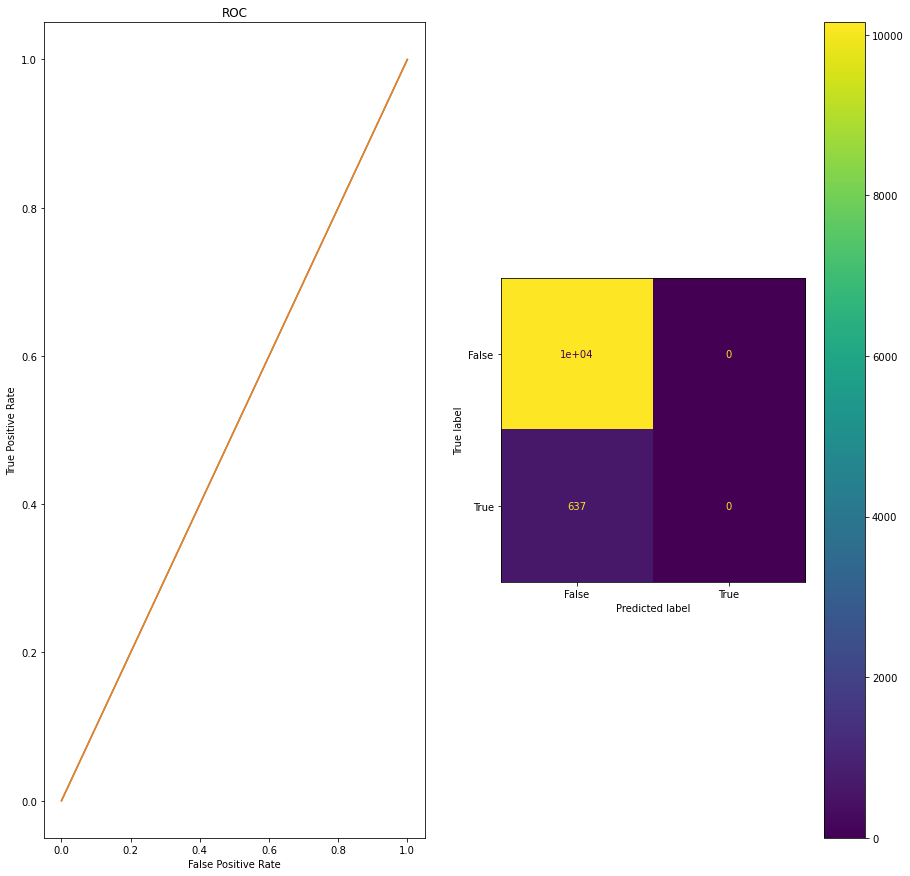

In [311]:
logisticR = LogisticRegression(random_state=42 ,max_iter=3000).fit(gneralX_train, gneraly_train)
logsticPerecdicr = logisticR.predict(gneralX_train)
scorForTest(logsticPerecdicr ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.9381755296152183
recall_score for test data : 0.0
precision_score for test data : 0.0
f1_score for test data : 0.0
roc_auc_score for test data : 0.5


/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


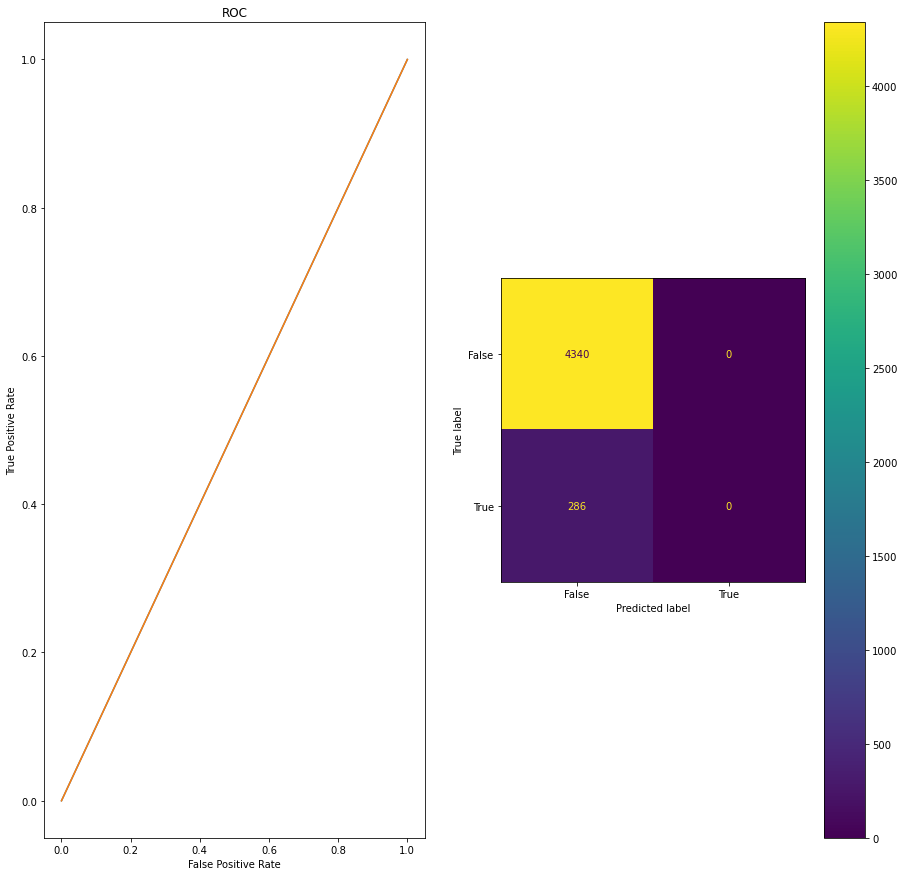

In [313]:
logsticPerecdicr = logisticR.predict(gneralX_test)
scorForTest(logsticPerecdicr ,gneraly_test)

### Undersampling

TEST DATA : 
accuracy_score for test data : 0.7854164736403224
recall_score for test data : 0.565149136577708
precision_score for test data : 0.15006252605252188
f1_score for test data : 0.23715415019762842
roc_auc_score for test data : 0.6821905588363136


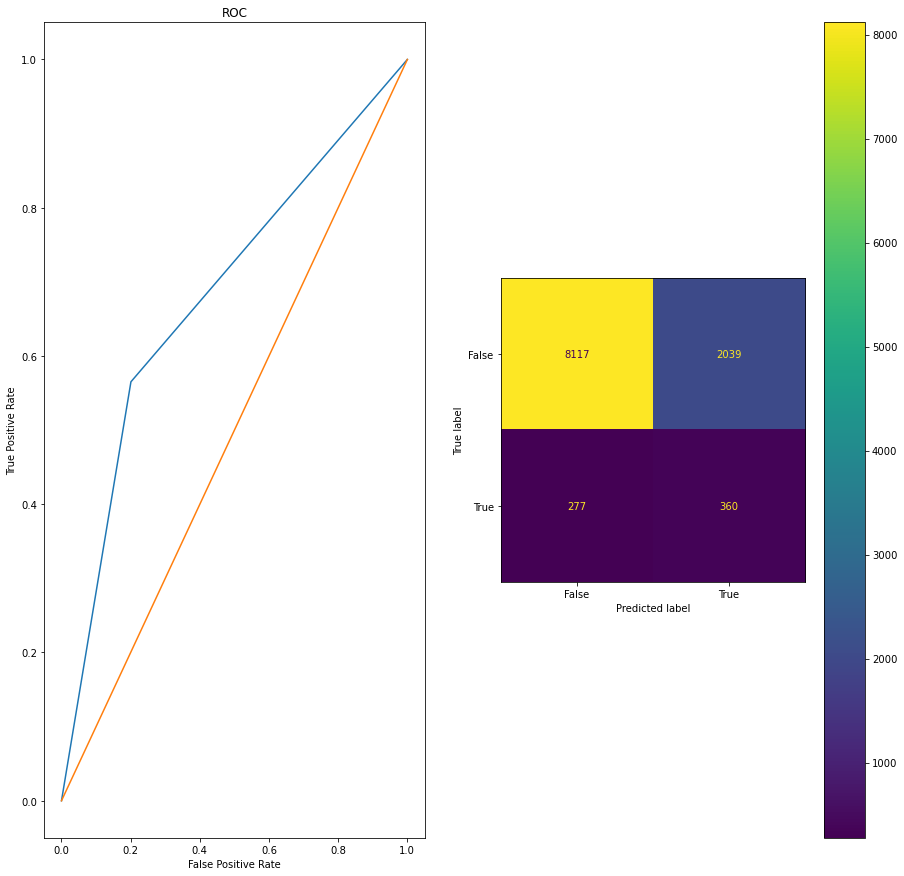

In [318]:
logisticR = LogisticRegression(random_state=42 ,max_iter=3000).fit(X_under, y_under)
logsticPerecdicr = logisticR.predict(gneralX_train)
scorForTest(logsticPerecdicr ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.7745352356247298
recall_score for test data : 0.5524475524475524
precision_score for test data : 0.14725069897483692
f1_score for test data : 0.23252391464311997
roc_auc_score for test data : 0.6708090296799974


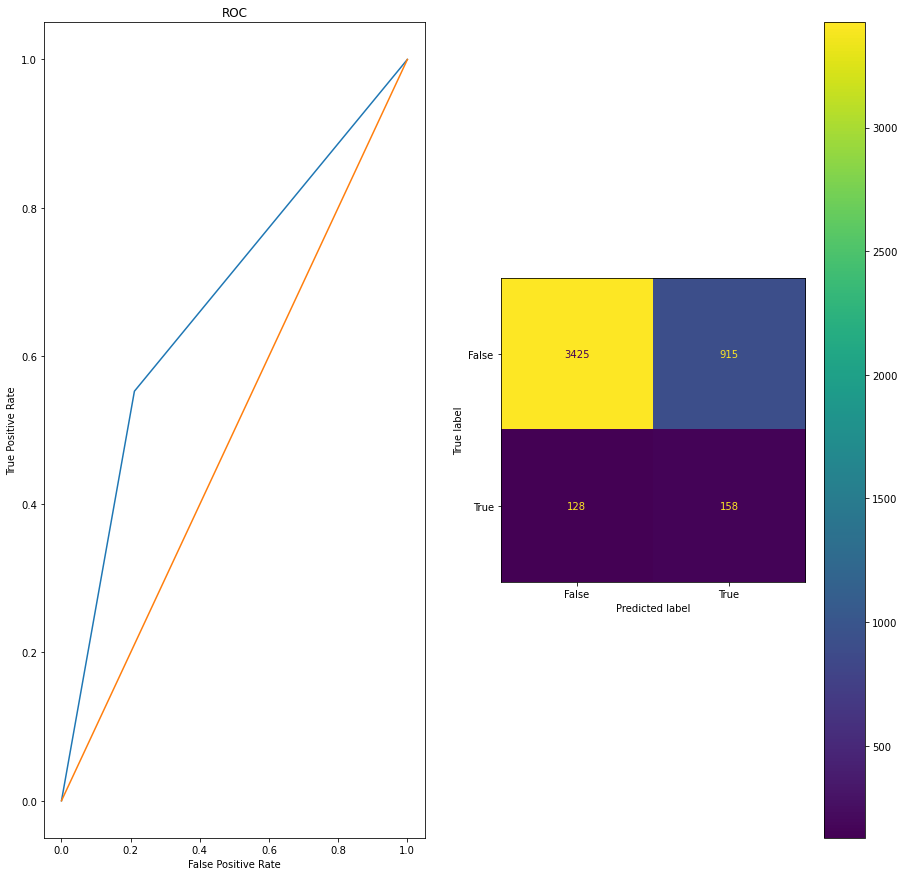

In [319]:
logsticPerecdicr = logisticR.predict(gneralX_test)
scorForTest(logsticPerecdicr ,gneraly_test)

### Oversampling

TEST DATA : 
accuracy_score for test data : 0.8458259983322524
recall_score for test data : 0.36577708006279436
precision_score for test data : 0.15606162089752176
f1_score for test data : 0.21877934272300467
roc_auc_score for test data : 0.6208562438517989


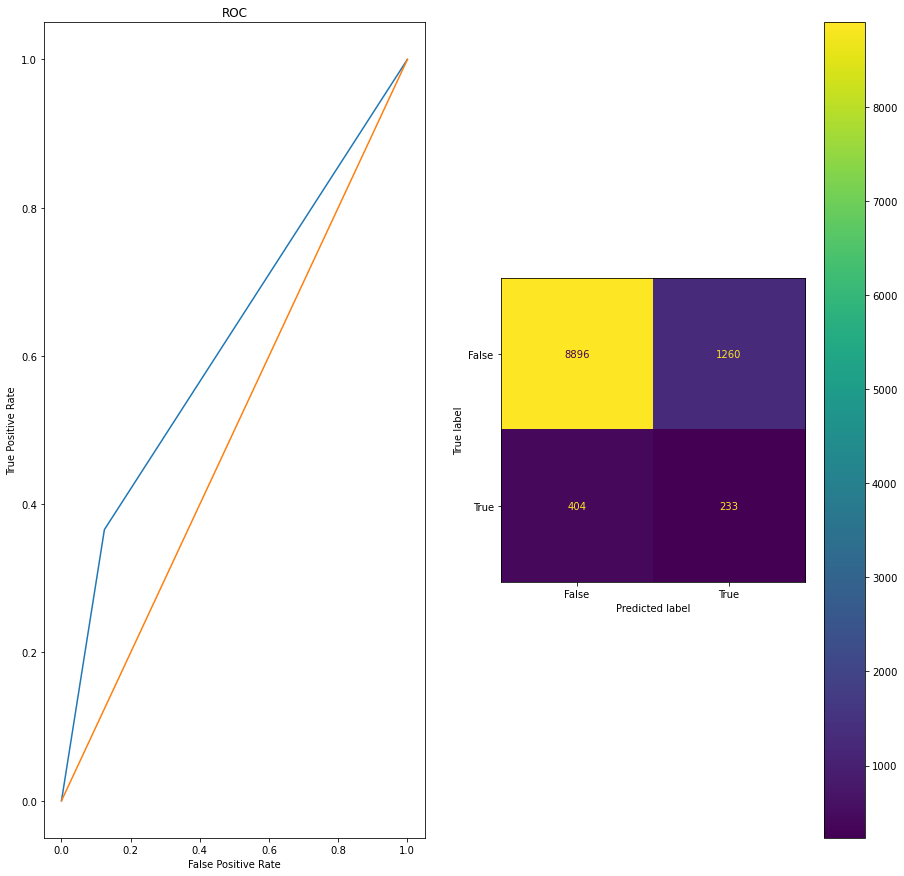

In [320]:
logisticR = LogisticRegression(random_state=42 ,max_iter=3000).fit(X_over, y_over)
logsticPerecdicr = logisticR.predict(gneralX_train)
scorForTest(logsticPerecdicr ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.8473843493298746
recall_score for test data : 0.3776223776223776
precision_score for test data : 0.16981132075471697
f1_score for test data : 0.23427331887201736
roc_auc_score for test data : 0.6279816957236312


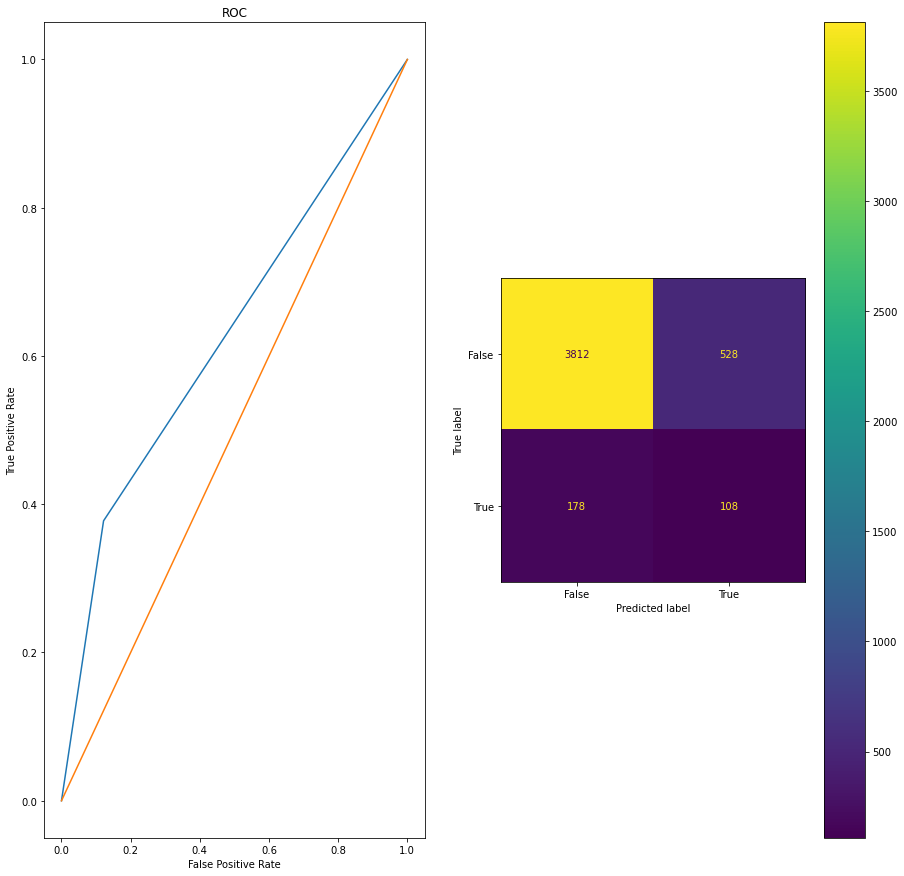

In [321]:
logsticPerecdicr = logisticR.predict(gneralX_test)
scorForTest(logsticPerecdicr ,gneraly_test)

In [333]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# SVM Models

## Linear SVC

### Imbalanc Data

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train DATA : 
accuracy_score for Train data : 0.9409802649865654
recall_score for Train data : 0.0
precision_score for Train data : 0.0
f1_score for Train data : 0.0
roc_auc_score for Train data : 0.5


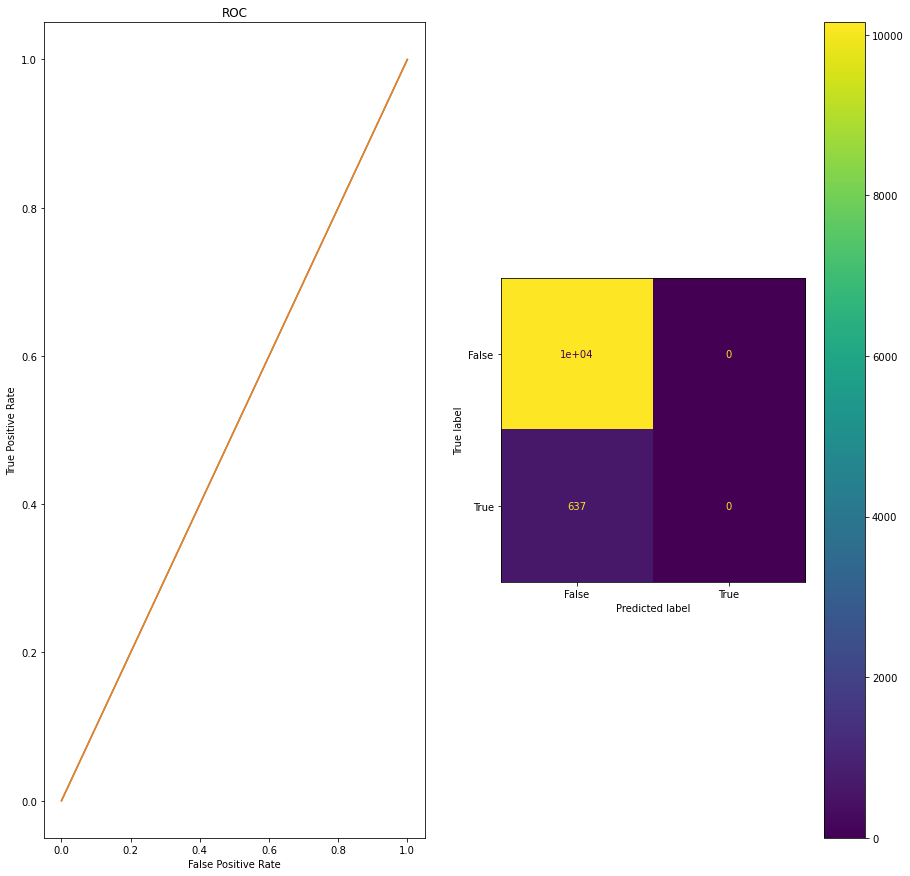

In [324]:
model = make_pipeline(StandardScaler(),LinearSVC(random_state=42, tol=1e-5))
model.fit(gneralX_train ,gneraly_train)
predictSVCLinear = model.predict(gneralX_train)
scorForTrain(predictSVCLinear ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.8465196714223951
recall_score for test data : 0.3881118881118881
precision_score for test data : 0.17182662538699692
f1_score for test data : 0.2381974248927039
roc_auc_score for test data : 0.6324199993554832


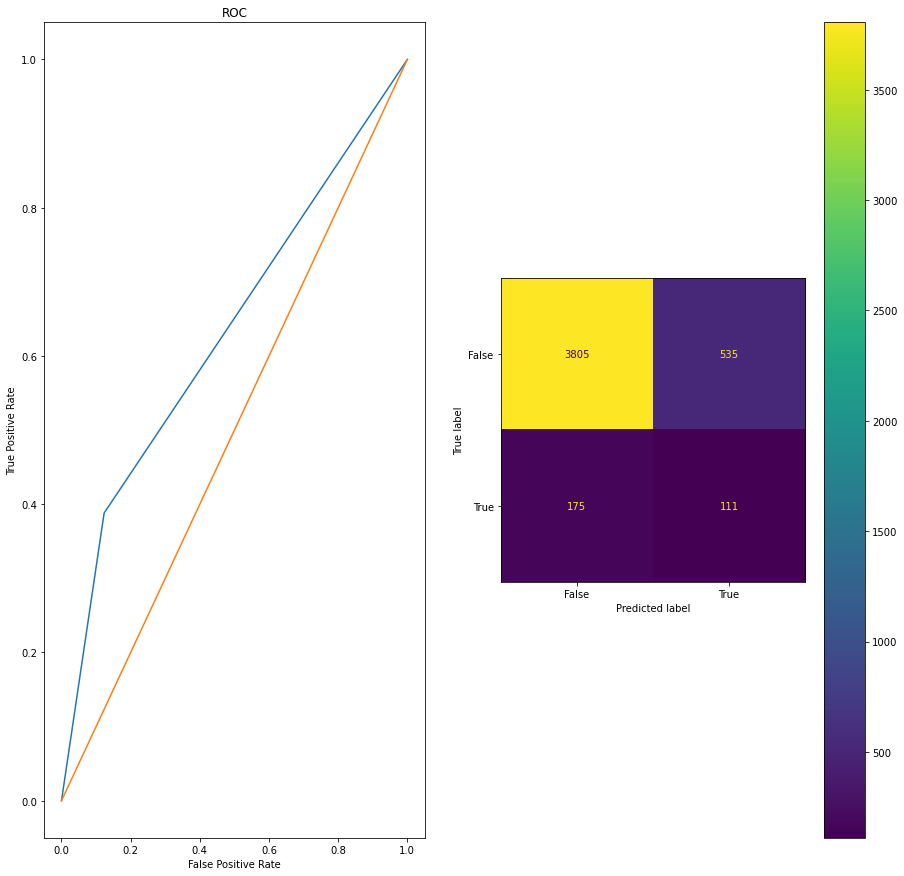

In [332]:
predictSVCLinear = model.predict(gneralX_test)
scorForTest(predictSVCLinear ,gneraly_test)

### Undersampling

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train DATA : 
accuracy_score for Train data : 0.770777355693505
recall_score for Train data : 0.6043956043956044
precision_score for Train data : 0.14767932489451477
f1_score for Train data : 0.2373612823674476
roc_auc_score for Train data : 0.6928043402048917


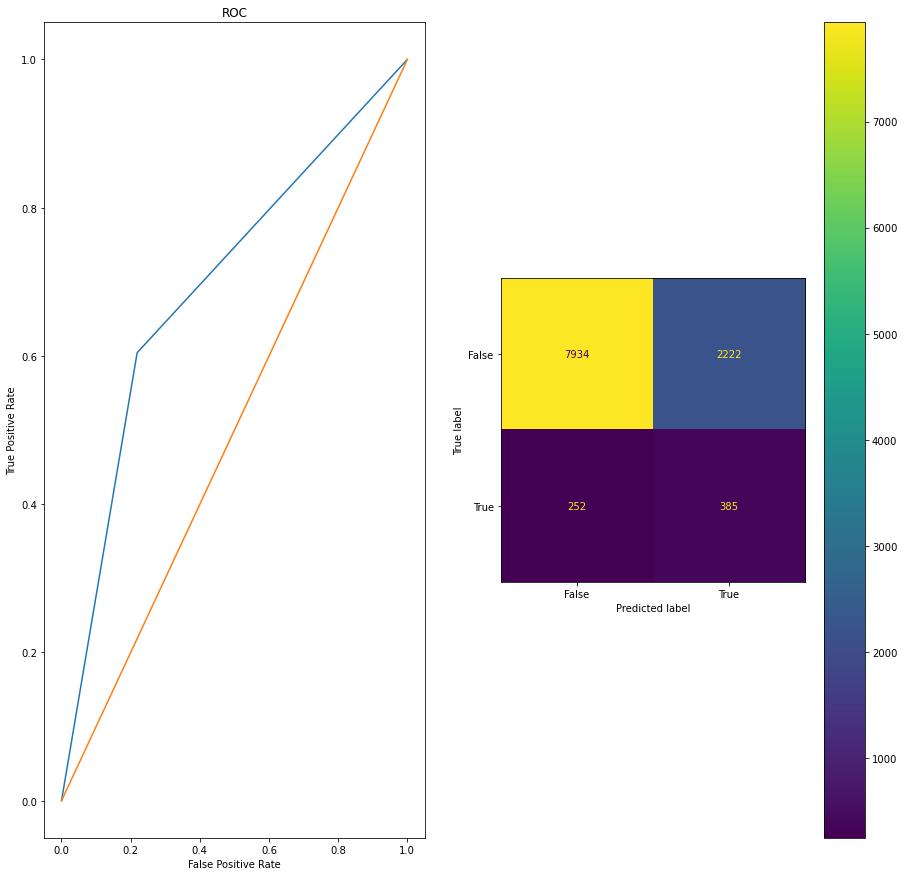

In [326]:
model = make_pipeline(StandardScaler(),LinearSVC(random_state=42, tol=1e-5))
model.fit(X_under ,y_under)
predictSVCLinear = model.predict(gneralX_train)
scorForTrain(predictSVCLinear ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.8465196714223951
recall_score for test data : 0.3881118881118881
precision_score for test data : 0.17182662538699692
f1_score for test data : 0.2381974248927039
roc_auc_score for test data : 0.6324199993554832


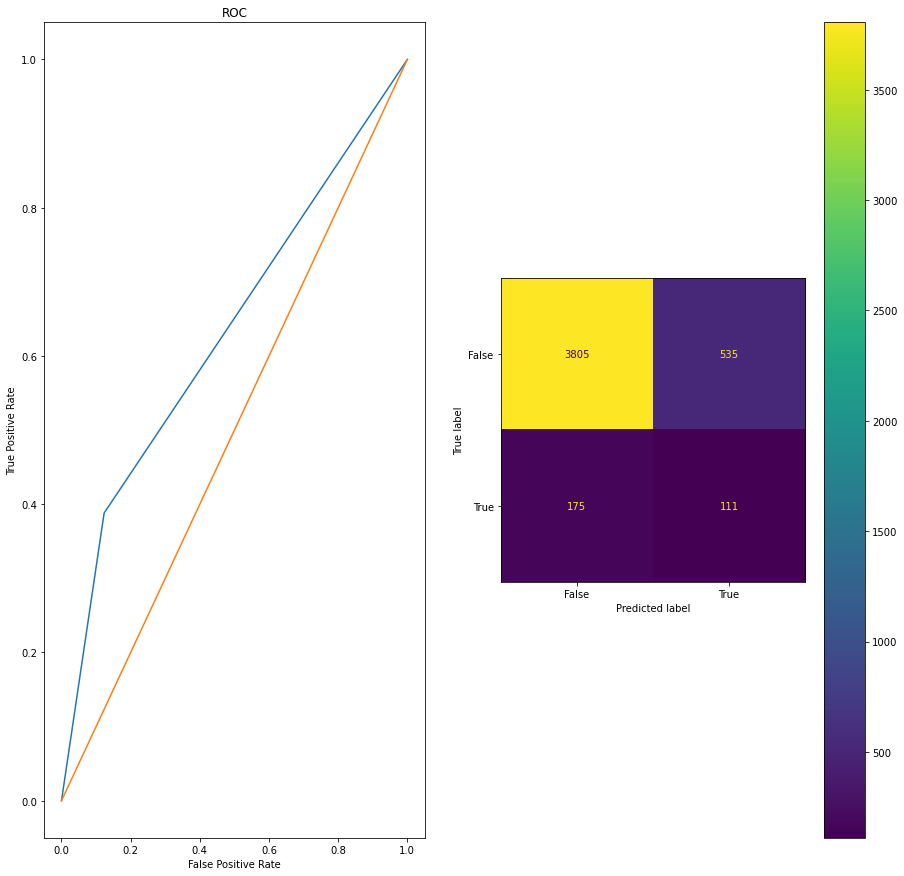

In [331]:
predictSVCLinear = model.predict(gneralX_test)
scorForTest(predictSVCLinear ,gneraly_test)

### Oversampling

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train DATA : 
accuracy_score for Train data : 0.8433243769109608
recall_score for Train data : 0.37205651491365777
precision_score for Train data : 0.1551047120418848
f1_score for Train data : 0.21893764434180138
roc_auc_score for Train data : 0.6224697698632882


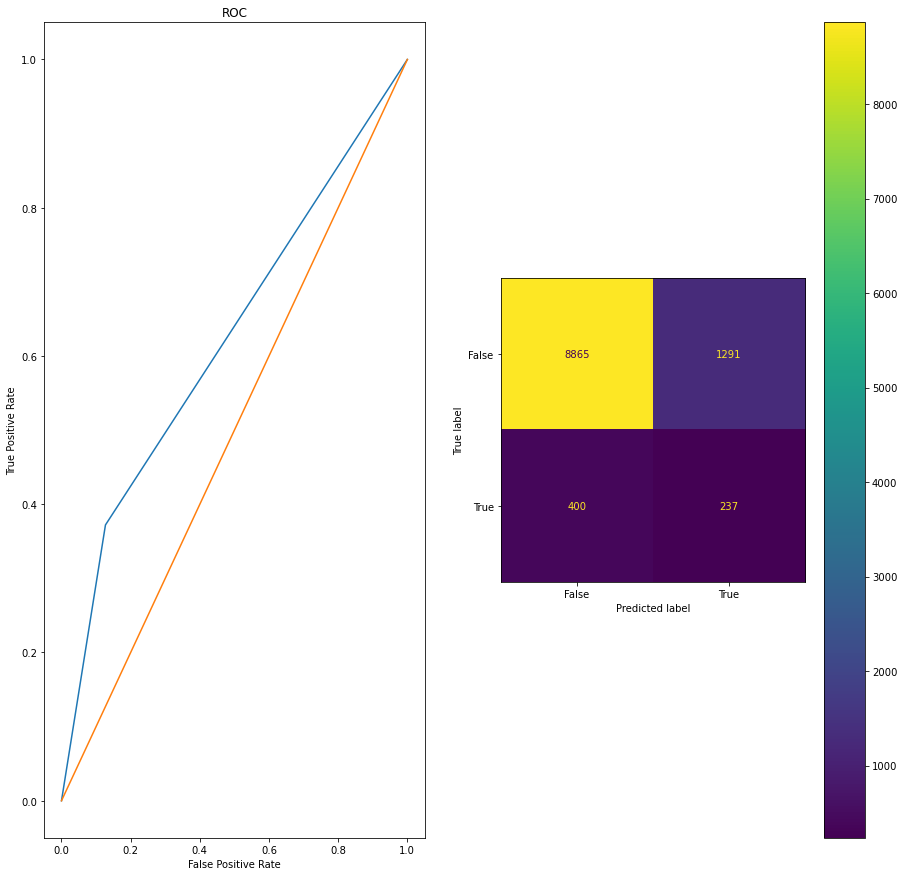

In [328]:
model = make_pipeline(StandardScaler(),LinearSVC(random_state=42, tol=1e-5))
model.fit(X_over ,y_over)
predictSVCLinear = model.predict(gneralX_train)
scorForTrain(predictSVCLinear ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.8465196714223951
recall_score for test data : 0.3881118881118881
precision_score for test data : 0.17182662538699692
f1_score for test data : 0.2381974248927039
roc_auc_score for test data : 0.6324199993554832


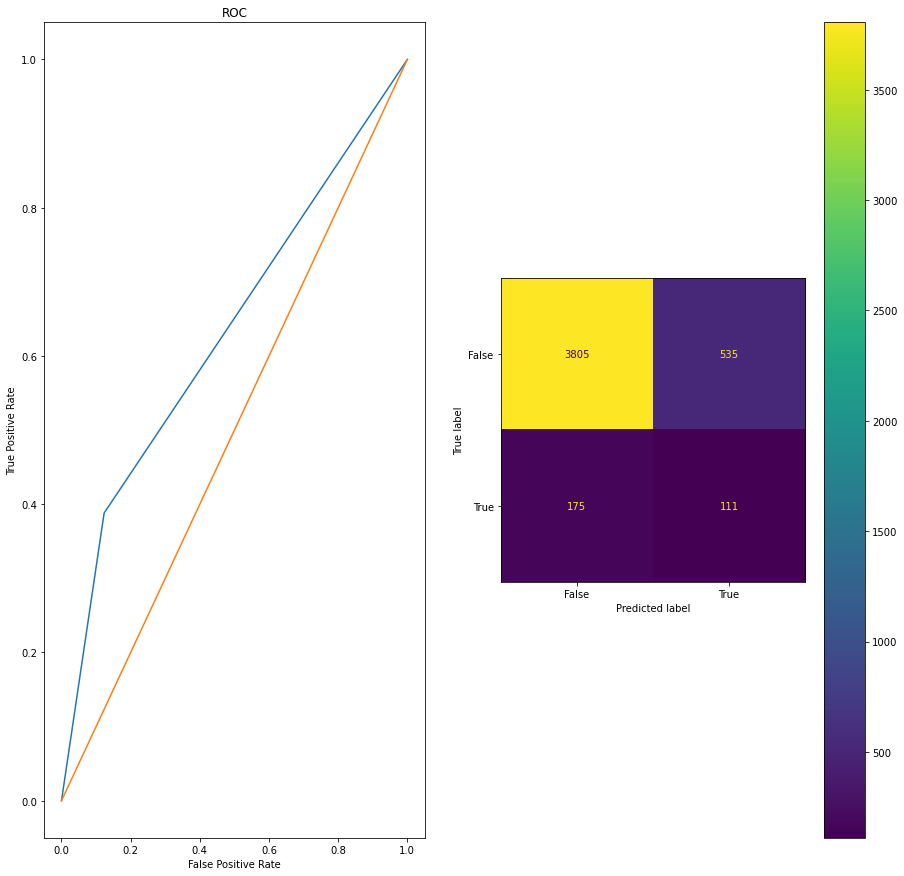

In [330]:
predictSVCLinear = model.predict(gneralX_test)
scorForTest(predictSVCLinear ,gneraly_test)

# Kernels

## Polynomial

### Imbalanc Data

In [ ]:
model = svm.SVC(kernel="poly",degree=3 ,C = 5)
model.fit(gneralX_train, gneraly_train)
print("aa")
predictPoly = model.predict(gneralX_train)
scorForTest(predictPoly ,gneraly_train)